# Visualisation of DoRothEA results

# `final_annot_v8` annotation

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata
import os
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
import pickle

In [2]:
np.random.seed(0)

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1


In [4]:
%%bash

pip freeze

absl-py==0.12.0
aiohttp==3.7.4.post0
airr==1.3.1
alabaster==0.7.12
alembic @ file:///home/conda/feedstock_root/build_artifacts/alembic_1613901514078/work
anndata @ file:///home/conda/feedstock_root/build_artifacts/anndata_1605539061264/work
anndata2ri==1.0.6
annoy @ file:///home/conda/feedstock_root/build_artifacts/python-annoy_1610271511811/work
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1614388751160/work/dist
arboreto==0.1.6
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1610522574055/work
async-generator==1.10
async-timeout==3.0.1
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1605083924122/work
Babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1605182336601/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache==1.6.1
bbknn @ file:///opt/conda/conda-bld/bbknn_1616434096000/work
bleach @ file:///home/conda/feedstock_root/build_artifac

In [6]:
# this may need to be redone once we understand more what happens at the end of the trajectory

TF_activities = {}

TF_activities_upreg = {}

comparisons = ['iEVT_vs_EVT','EVT_vs_EVT_early',
               'EVT_early_vs_VCT_CCC','VCT_CCC_vs_VCT',
              ]

for comparison in comparisons:
    print(comparison)
    
    TF_activities[comparison] = pd.read_csv('./results/20220116/20220116_TF_activities_' + comparison + '.csv',
                                           sep='\t')
    
    # add a score (A, B, .., F) and TF_name
    TF_activities[comparison]['score'] = [elem.split('_')[1] for elem in TF_activities[comparison]['Regulon']]
    TF_activities[comparison]['TF_name'] = [elem.split('_')[0] for elem in TF_activities[comparison]['Regulon']]
    
    # only taking TFs that are active (NES > 0)
    TF_activities_upreg[comparison] = TF_activities[comparison][TF_activities[comparison]['NES'] > 0]
    # also taking only those that have FDR < 0.05, like in DE
    TF_activities_upreg[comparison] = TF_activities_upreg[comparison][TF_activities_upreg[comparison]['FDR'] < 0.05]
    
    print('number of TFs overall:', len(TF_activities[comparison]))
    print('number of significant upreg active TFs:', len(TF_activities_upreg[comparison]),'\n')

iEVT_vs_EVT
number of TFs overall: 1385
number of significant upreg active TFs: 716 

EVT_vs_EVT_early
number of TFs overall: 1385
number of significant upreg active TFs: 172 

EVT_early_vs_VCT_CCC
number of TFs overall: 1385
number of significant upreg active TFs: 131 

VCT_CCC_vs_VCT
number of TFs overall: 1385
number of significant upreg active TFs: 452 



In [8]:
TF_activities['iEVT_vs_EVT']

Regulon  Size        NES        p.value            FDR score  \
GTF3A_E    GTF3A_E  1209 -36.164859  2.173170e-286  3.009841e-283     E   
PHF5A_E    PHF5A_E  1701 -34.325206  3.302110e-258  2.286711e-255     E   
THAP4_E    THAP4_E  1144 -32.961598  2.885614e-238  1.332192e-235     E   
ZNF32_E    ZNF32_E   808 -32.517133  6.106057e-232  2.114222e-229     E   
KDM2A_E    KDM2A_E   598  23.955955  8.009872e-127  2.218735e-124     E   
...            ...   ...        ...            ...            ...   ...   
ZNF683_E  ZNF683_E   165   0.037751   9.698863e-01   9.726956e-01     E   
RFX5_AA    RFX5_AA     7  -0.030975   9.752896e-01   9.774067e-01    AA   
ELK4_C      ELK4_C    12  -0.026693   9.787044e-01   9.801197e-01     C   
ZNF148_D  ZNF148_D     9   0.023046   9.816133e-01   9.823226e-01     D   
ATOH8_E    ATOH8_E   264  -0.014969   9.880570e-01   9.880570e-01     E   

         TF_name  
GTF3A_E    GTF3A  
PHF5A_E    PHF5A  
THAP4_E    THAP4  
ZNF32_E    ZNF32  
KDM2A_E    KDM2A  
...          ...  
ZNF683_E  ZNF683  
RFX5_AA     RFX5  
ELK4_C      ELK4  
ZNF148_D  ZNF148  
ATOH8_E    ATOH8  

[1385 rows x 7 columns]

In [9]:
TF_activities['iEVT_vs_EVT']['score'].value_counts()

E     990
C     135
B      94
D      62
A      53
AA     51
Name: score, dtype: int64

In [10]:
TF_activities['iEVT_vs_EVT'][TF_activities['iEVT_vs_EVT']['score'].isin(['AA','A','B'])].sort_values('NES', ascending=False)

Regulon  Size        NES       p.value           FDR score TF_name
PRDM14_B  PRDM14_B   175   5.152491  2.570493e-07  8.683251e-07     B  PRDM14
STAT2_B    STAT2_B    42   4.812732  1.488810e-06  4.551880e-06     B   STAT2
USF2_AA    USF2_AA    13   3.815711  1.357916e-04  3.150273e-04    AA    USF2
CTCF_AA    CTCF_AA    36   3.338591  8.420443e-04  1.745855e-03    AA    CTCF
TAL1_AA    TAL1_AA    11   2.648592  8.082774e-03  1.418839e-02    AA    TAL1
...            ...   ...        ...           ...           ...   ...     ...
ESR2_A      ESR2_A     7  -3.640346  2.722718e-04  6.043212e-04     A    ESR2
HIF1A_AA  HIF1A_AA    56  -4.963645  6.918237e-07  2.223146e-06    AA   HIF1A
MYC_AA      MYC_AA   142  -5.578805  2.421760e-08  9.114503e-08    AA     MYC
FOXP1_B    FOXP1_B   165  -8.003602  1.208319e-15  6.858697e-15     B   FOXP1
ZNF263_B  ZNF263_B   286 -10.047951  9.379753e-24  8.222125e-23     B  ZNF263

[198 rows x 7 columns]

In [11]:
pd.options.display.max_rows = 500


In [12]:
TF_activities['iEVT_vs_EVT'][TF_activities['iEVT_vs_EVT']['score'].isin(['AA','A','B'])].sort_values('NES', ascending=False)

Regulon  Size        NES       p.value           FDR score  \
PRDM14_B    PRDM14_B   175   5.152491  2.570493e-07  8.683251e-07     B   
STAT2_B      STAT2_B    42   4.812732  1.488810e-06  4.551880e-06     B   
USF2_AA      USF2_AA    13   3.815711  1.357916e-04  3.150273e-04    AA   
CTCF_AA      CTCF_AA    36   3.338591  8.420443e-04  1.745855e-03    AA   
TAL1_AA      TAL1_AA    11   2.648592  8.082774e-03  1.418839e-02    AA   
GLI2_A        GLI2_A    12   2.502383  1.233603e-02  2.117150e-02     A   
ETV4_A        ETV4_A    14   2.464349  1.372625e-02  2.329761e-02     A   
STAT1_AA    STAT1_AA    75   2.386418  1.701342e-02  2.845843e-02    AA   
ETS1_AA      ETS1_AA    60   2.293579  2.181466e-02  3.605407e-02    AA   
RXRA_A        RXRA_A     9   2.271543  2.311414e-02  3.806550e-02     A   
GATA3_AA    GATA3_AA    21   2.175802  2.957007e-02  4.745603e-02    AA   
SP4_B          SP4_B    10   2.043192  4.103345e-02  6.399924e-02     B   
NFKBIA_B    NFKBIA_B    15   2.032355  4.211773e-02  6.546919e-02     B   
BACH1_B      BACH1_B    28   2.029075  4.245065e-02  6.591273e-02     B   
LEF1_A        LEF1_A    16   1.843572  6.524556e-02  9.768304e-02     A   
TWIST1_A    TWIST1_A    26   1.798094  7.216217e-02  1.063241e-01     A   
NR1H3_B      NR1H3_B    12   1.751343  7.988693e-02  1.161001e-01     B   
TFAP2A_AA  TFAP2A_AA    16   1.741407  8.161226e-02  1.182353e-01    AA   
YBX1_A        YBX1_A     9   1.713296  8.665814e-02  1.248923e-01     A   
IRF9_B        IRF9_B    11   1.691793  9.068545e-02  1.297514e-01     B   
PAX6_B        PAX6_B     9   1.676644  9.361203e-02  1.334944e-01     B   
RBPJ_B        RBPJ_B    25   1.611708  1.070254e-01  1.503349e-01     B   
NR0B2_B      NR0B2_B     8   1.506183  1.320201e-01  1.819382e-01     B   
HES1_B        HES1_B    12   1.476486  1.398135e-01  1.909682e-01     B   
USF1_AA      USF1_AA    20   1.453906  1.459723e-01  1.984020e-01    AA   
ZBTB33_B    ZBTB33_B    11   1.440838  1.496305e-01  2.025789e-01     B   
ATF6_A        ATF6_A    11   1.354144  1.756903e-01  2.339722e-01     A   
CREM_B        CREM_B    11   1.328688  1.839511e-01  2.433354e-01     B   
NFATC2_B    NFATC2_B     6   1.290234  1.969695e-01  2.583360e-01     B   
NR4A1_B      NR4A1_B    24   1.277540  2.014117e-01  2.636628e-01     B   
NR1H2_B      NR1H2_B    13   1.272686  2.031294e-01  2.654097e-01     B   
TCF7_B        TCF7_B    11   1.259556  2.078296e-01  2.710395e-01     B   
OSR1_B        OSR1_B     7   1.226997  2.198237e-01  2.840073e-01     B   
ESRRA_B      ESRRA_B    14   1.212917  2.251616e-01  2.900919e-01     B   
IRF4_B        IRF4_B     6   1.205132  2.281523e-01  2.933992e-01     B   
NFE2L1_B    NFE2L1_B    25   1.171642  2.413407e-01  3.086398e-01     B   
ETS2_A        ETS2_A    24   1.150107  2.500997e-01  3.169149e-01     A   
TWIST2_A    TWIST2_A    21   1.114677  2.649890e-01  3.336452e-01     A   
RUNX1_AA    RUNX1_AA    10   1.081545  2.794548e-01  3.502668e-01    AA   
KLF6_B        KLF6_B    16   1.030085  3.029702e-01  3.763352e-01     B   
SOX9_A        SOX9_A    10   1.012702  3.112024e-01  3.855235e-01     A   
MEF2A_B      MEF2A_B    10   0.991404  3.214885e-01  3.964929e-01     B   
E2F6_B        E2F6_B    11   0.968273  3.329079e-01  4.094826e-01     B   
TCF3_B        TCF3_B    21   0.950593  3.418110e-01  4.189470e-01     B   
ELF3_B        ELF3_B    11   0.932540  3.510577e-01  4.283831e-01     B   
MYCN_A        MYCN_A    16   0.905045  3.654416e-01  4.439794e-01     A   
YY1_AA        YY1_AA    16   0.899923  3.681613e-01  4.465004e-01    AA   
KLF5_B        KLF5_B    14   0.877765  3.800712e-01  4.601387e-01     B   
HMGA1_B      HMGA1_B     9   0.840980  4.003591e-01  4.823259e-01     B   
TCF4_B        TCF4_B    16   0.801760  4.226920e-01  5.042450e-01     B   
REST_A        REST_A     5   0.793684  4.273797e-01  5.083205e-01     A   
IRF1_AA      IRF1_AA    11   0.788548  4.303763e-01  5.107723e-01    AA   
MEF2C_B      MEF2C_B    11   0.750412 

## Adding another layer of evidence: differential expression

In [13]:
# all TF regulons list, same in all tables
TFs_list = list(TF_activities['iEVT_vs_EVT']['TF_name'])

In [14]:
len(TFs_list)

1385

In [15]:
# reading in tables of DE for ct-vs-previous_ct comparisons
# genes upreg in pre-GC vs iEVT comparison
DEGs = {}

DEGs_significant_upreg = {}

DEGs_significant_upreg_TFs = {} # intersection of significant upreg DEGs with all TFs list

for comparison in comparisons:
    print(comparison)
    DEGs[comparison] = pd.read_csv('/home/jovyan/notebooks/Vento_Lab/MFI_spatial/Trophoblast_Organoids/202105_joint_analysis/no_cytokine_analysis/limma_DEGs/20220116_with_donor_covariate/20220116_' + comparison + '_no_cytokines_limma_DEGs.csv', 
                                   index_col=0)
    DEGs_significant_upreg[comparison] = DEGs[comparison][DEGs[comparison]['adj.P.Val'] < 0.05]
    DEGs_significant_upreg[comparison] = DEGs_significant_upreg[comparison][DEGs_significant_upreg[comparison]['logFC'] > 0]
    
    DEGs_significant_upreg_TFs[comparison] = DEGs_significant_upreg[comparison].loc[list(set(TFs_list) & set(DEGs_significant_upreg[comparison].index)),:]
    
    print('number of DEGs overall:', len(DEGs[comparison]))
    print('number of significant upreg DEGs:', len(DEGs_significant_upreg[comparison]))
    print('number of significant upreg DEGs that are TFs:', len(DEGs_significant_upreg_TFs[comparison]),'\n')


iEVT_vs_EVT
number of DEGs overall: 20805
number of significant upreg DEGs: 5159
number of significant upreg DEGs that are TFs: 374 

EVT_vs_EVT_early
number of DEGs overall: 21498
number of significant upreg DEGs: 3913
number of significant upreg DEGs that are TFs: 128 

EVT_early_vs_VCT_CCC
number of DEGs overall: 21664
number of significant upreg DEGs: 3902
number of significant upreg DEGs that are TFs: 251 

VCT_CCC_vs_VCT
number of DEGs overall: 22091
number of significant upreg DEGs: 6016
number of significant upreg DEGs that are TFs: 469 



In [14]:
# seeing the overlap of genome features (gene names) and TFs list here

from gtfparse import read_gtf # needs 'pip install gtfparse'

# returns GTF with essential columns such as "feature", "seqname", "start", "end"
# alongside the names of any optional keys which appeared in the attribute column
GRCh38_300_genes = read_gtf('/lustre/scratch117/cellgen/team292/aa22/souporcell_analyses/refdata-cellranger-GRCh38-3.0.0/genes/genes.gtf')

ModuleNotFoundError: No module named 'gtfparse'

In [ ]:
GRCh38_300_genes['feature'].value_counts()

In [11]:
GRCh38_300_genes = GRCh38_300_genes[GRCh38_300_genes['feature'] == 'gene']

In [13]:
GRCh38_300_genes.columns

Index(['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand',
       'frame', 'gene_id', 'gene_version', 'gene_name', 'gene_source',
       'gene_biotype', 'transcript_id', 'transcript_version',
       'transcript_name', 'transcript_source', 'transcript_biotype', 'tag',
       'transcript_support_level', 'exon_number', 'exon_id', 'exon_version',
       'protein_id', 'protein_version', 'ccds_id'],
      dtype='object')

In [16]:
# full list of gene names from my genome used to align
GRCh38_300_genes_list = list(GRCh38_300_genes['gene_name'])
len(GRCh38_300_genes_list)

33538

In [23]:
len(TFs_list)

1385

In [21]:
len(set(TFs_list))

1385

In [25]:
len(set(GRCh38_300_genes_list) & set(TFs_list))

1385

In [24]:
len(set(GRCh38_300_genes_list) & set(TFs_list)) == len(set(TFs_list))

True

Ok so good news - all the TFs from dorothea are in our reference genome, so there is no nomenclature discrepancy, carrying on..

In [16]:
DEGs_significant_upreg['EVT_vs_EVT_early']

logFC   P.Value  adj.P.Val  AveExpr_cluster  AveExpr_rest  \
Gene                                                                       
NOTUM       2.423140  0.000000   0.000000         3.445863      0.843468   
MCAM        1.146897  0.000000   0.000000         1.420157      0.193754   
ADAM19      1.196094  0.000000   0.000000         1.741317      0.467627   
HTRA4       1.616656  0.000000   0.000000         2.484146      0.596038   
CSH1        2.393522  0.000000   0.000000         4.887507      2.240312   
...              ...       ...        ...              ...           ...   
ZNF571-AS1  0.002812  0.023744   0.049668         0.008233      0.006453   
PLEKHG5     0.005814  0.023786   0.049748         0.035706      0.026397   
TPRA1       0.013972  0.023830   0.049830         0.198760      0.183258   
TOMM40      0.017051  0.023871   0.049906         0.335184      0.303115   
TYW1        0.009140  0.023904   0.049970         0.087621      0.078171   

            percentExpr_cluster  percentExpr_rest  
Gene                                               
NOTUM                  0.934763          0.517948  
MCAM                   0.802959          0.179648  
ADAM19                 0.906805          0.414324  
HTRA4                  0.894822          0.439045  
CSH1                   0.983580          0.853539  
...                         ...               ...  
ZNF571-AS1             0.019970          0.011514  
PLEKHG5                0.089793          0.040637  
TPRA1                  0.389053          0.242973  
TOMM40                 0.542899          0.374873  
TYW1                   0.202071          0.122079  

[3913 rows x 7 columns]

In [17]:
TF_activities_upreg['EVT_vs_EVT_early']

Regulon  Size        NES       p.value           FDR score  \
GTF3A_E      GTF3A_E  1210  20.445398  6.601818e-93  9.143518e-90     E   
DNAJC1_E    DNAJC1_E  1082  15.600822  7.186254e-55  1.990592e-52     E   
RCOR3_E      RCOR3_E   568  14.464619  2.027240e-47  3.119697e-45     E   
PHF5A_E      PHF5A_E  1701  14.383029  6.613559e-47  8.327073e-45     E   
ZNF513_E    ZNF513_E   777  13.472865  2.259252e-41  2.235045e-39     E   
ZNF91_E      ZNF91_E   447  12.616322  1.716538e-36  1.188703e-34     E   
ZNF668_E    ZNF668_E   504  12.219264  2.452954e-34  1.617782e-32     E   
THAP4_E      THAP4_E  1144  12.000766  3.520253e-33  2.119805e-31     E   
ZNF397_E    ZNF397_E   424  11.967281  5.272835e-33  3.042865e-31     E   
ZNF224_E    ZNF224_E   489  11.806884  3.596428e-32  1.844834e-30     E   
WIZ_E          WIZ_E   910  11.735597  8.373300e-32  4.141793e-30     E   
ZBTB47_E    ZBTB47_E   728  11.670154  1.810946e-31  8.090840e-30     E   
GATAD2B_E  GATAD2B_E   411  11.118249  1.022597e-28  3.934159e-27     E   
ZNF469_E    ZNF469_E   442  11.090711  1.391777e-28  5.072660e-27     E   
ZNF383_E    ZNF383_E   223  11.041438  2.411419e-28  8.349539e-27     E   
MLX_E          MLX_E  1341  10.852971  1.930471e-27  6.521225e-26     E   
ZNF431_E    ZNF431_E   320  10.820119  2.764184e-27  9.115225e-26     E   
ZNF239_E    ZNF239_E   625  10.763484  5.119718e-27  1.575735e-25     E   
MESP1_E      MESP1_E   495  10.608939  2.708055e-26  7.654401e-25     E   
NFKBIB_E    NFKBIB_E   808  10.511936  7.611458e-26  2.067033e-24     E   
ZBTB1_E      ZBTB1_E   255  10.410145  2.228825e-25  5.824384e-24     E   
ATF5_E        ATF5_E   328  10.109189  5.029900e-24  1.180748e-22     E   
ZSCAN5A_E  ZSCAN5A_E   476  10.031856  1.104210e-23  2.466662e-22     E   
TSHZ3_E      TSHZ3_E   900   9.936122  2.898940e-23  6.083381e-22     E   
MEIS3_E      MEIS3_E   952   9.151483  5.615716e-20  9.485082e-19     E   
ZNF787_E    ZNF787_E   660   9.114751  7.885143e-20  1.300110e-18     E   
ZBTB42_E    ZBTB42_E   599   8.965484  3.089203e-19  4.753940e-18     E   
PHTF1_E      PHTF1_E   578   8.887457  6.252358e-19  9.212251e-18     E   
ZNF93_E      ZNF93_E    58   8.721745  2.739474e-18  3.871604e-17     E   
NFKBIE_E    NFKBIE_E   649   8.632559  5.999433e-18  8.393146e-17     E   
ZNF606_E    ZNF606_E   254   8.545520  1.279587e-17  1.720610e-16     E   
ZNF580_E    ZNF580_E   464   8.506908  1.786336e-17  2.312220e-16     E   
LYAR_E        LYAR_E  1032   8.420722  3.741705e-17  4.711147e-16     E   
ZNF568_E    ZNF568_E   169   8.305071  9.976006e-17  1.170913e-15     E   
ZNF354C_E  ZNF354C_E   352   8.263936  1.409463e-16  1.626755e-15     E   
ZNF35_E      ZNF35_E   569   8.243008  1.679339e-16  1.906463e-15     E   
GLIS2_E      GLIS2_E  1003   8.038283  9.110600e-16  9.706293e-15     E   
HMG20B_E    HMG20B_E   808   8.002239  1.221773e-15  1.281936e-14     E   
ZFP69B_E    ZFP69B_E   392   7.978978  1.475496e-15  1.536513e-14     E   
ZBED6_E      ZBED6_E   284   7.918637  2.401290e-15  2.392652e-14     E   
ZNF423_E    ZNF423_E   942   7.773994  7.604912e-15  7.116759e-14     E   
BNC2_E        BNC2_E   614   7.579787  3.461228e-14  3.034051e-13     E   
HEYL_E        HEYL_E   364   7.298656  2.906553e-13  2.367986e-12     E   
NRL_E          NRL_E   718   7.287319  3.161827e-13  2.560895e-12     E   
ZBTB45_E    ZBTB45_E   654   7.278651  3.371736e-13  2.715032e-12     E   
ZNF575_E    ZNF575_E   498   7.150019  8.676577e-13  6.602780e-12     E   
ZNF511_E    ZNF511_E   704   6.999257  2.573236e-12  1.895709e-11     E   
ELF4_E        ELF4_E   948   6.930451  4.195003e-12  3.041926e-11     E   
TFE3_E        TFE3_E  1352   6.878420  6.052003e-12  4.233345e-11     E   
ZBED4_E      ZBED4_E   808   6.774726  1.246423e-11  8.420952e-11     E   
ZNF219_E    ZNF219_E   452   6.518587  7.097265e-11  4.509042e-10     E   
ZNF414_E    ZNF414_E   726   6.410390  1.451476e-10  8.855921e-10     E   
ZNF771_E    ZNF771_E   390   6.355740 

In [18]:
np.unique(TF_activities_upreg['EVT_vs_EVT_early']['FDR'])

array([9.14351788e-90, 1.99059241e-52, 3.11969682e-45, 8.32707254e-45,
       2.23504525e-39, 1.18870278e-34, 1.61778178e-32, 2.11980481e-31,
       3.04286540e-31, 1.84483440e-30, 4.14179287e-30, 8.09084040e-30,
       3.93415893e-27, 5.07266024e-27, 8.34953859e-27, 6.52122507e-26,
       9.11522502e-26, 1.57573532e-25, 7.65440105e-25, 2.06703326e-24,
       5.82438350e-24, 1.18074759e-22, 2.46666162e-22, 6.08338134e-22,
       9.48508167e-19, 1.30010984e-18, 4.75394019e-18, 9.21225099e-18,
       3.87160387e-17, 8.39314554e-17, 1.72060965e-16, 2.31221957e-16,
       4.71114658e-16, 1.17091252e-15, 1.62675515e-15, 1.90646270e-15,
       9.70629314e-15, 1.28193640e-14, 1.53651262e-14, 2.39265243e-14,
       7.11675931e-14, 3.03405093e-13, 2.36798581e-12, 2.56089457e-12,
       2.71503197e-12, 6.60277997e-12, 1.89570872e-11, 3.04192595e-11,
       4.23334520e-11, 8.42095214e-11, 4.50904225e-10, 8.85592138e-10,
       1.22770810e-09, 1.50896633e-09, 1.96770524e-09, 2.85574134e-09,
      

## First attempt: let's take a union of all the TFs DE according to limma and those that are active according to DoRothEA

In [19]:
TFs_upregulated_per_comparison = {}

for comparison in comparisons:
    print(comparison)
    TFs_upregulated_per_comparison[comparison] = pd.DataFrame(index = set(list(DEGs_significant_upreg_TFs[comparison].index) + list(TF_activities_upreg[comparison]['TF_name'])))
    TFs_upregulated_per_comparison[comparison]['Avg_expr'] = ['na']*len(TFs_upregulated_per_comparison[comparison])
    
    TFs_upregulated_per_comparison[comparison]['is_DE_limma'] = ['na']*len(TFs_upregulated_per_comparison[comparison])
    TFs_upregulated_per_comparison[comparison]['is_DA_dorothea'] = ['na']*len(TFs_upregulated_per_comparison[comparison]) # DA for differentially active
    
    # add whether TF is coming from limma DE or DoRothEA or both
    TFs_upregulated_per_comparison[comparison]['is_DE_limma'] = ['yes' if TF in list(DEGs_significant_upreg_TFs[comparison].index) else 'no' for TF in TFs_upregulated_per_comparison[comparison].index]
    TFs_upregulated_per_comparison[comparison]['is_DA_dorothea'] = ['yes' if TF in list(TF_activities_upreg[comparison]['TF_name']) else 'no' for TF in TFs_upregulated_per_comparison[comparison].index]
    TFs_upregulated_per_comparison[comparison]['is_DA_and_DE'] = ['yes' if ((TF in list(TF_activities_upreg[comparison]['TF_name'])) 
                                                                            & (TF in list(DEGs_significant_upreg_TFs[comparison].index))) else 'no' for TF in TFs_upregulated_per_comparison[comparison].index]

    
    print(len(TFs_upregulated_per_comparison[comparison]),'\n')
    
    for TF in TFs_upregulated_per_comparison[comparison].index:
        #print(TF)
        
        # add average expression from overall unfiltered limma table if it's there
        if TF in DEGs[comparison].index: # if it's expressed enough according to limma
            TFs_upregulated_per_comparison[comparison].loc[TF,'Avg_expr'] = DEGs[comparison].loc[TF,'AveExpr_cluster']
        else:
            TFs_upregulated_per_comparison[comparison].loc[TF,'Avg_expr'] = 'not_enough_cells_expr_limma'
            
            
            
    
    

iEVT_vs_EVT
850 

EVT_vs_EVT_early
276 

EVT_early_vs_VCT_CCC
340 

VCT_CCC_vs_VCT
709 



In [21]:
TFs_upregulated_per_comparison['EVT_early_vs_VCT_CCC']

Avg_expr is_DE_limma is_DA_dorothea is_DA_and_DE
IKZF1                        0.000062          no            yes           no
HIF1A                        0.453623         yes            yes          yes
MEF2C                        0.021201         yes             no           no
ETV3                         0.098574         yes             no           no
WT1                          0.000276          no            yes           no
ELF4                         0.166705         yes            yes          yes
ZNF148                       0.283826         yes             no           no
PPP1R13L                     0.355143         yes             no           no
MAFF                         0.435846         yes             no           no
ZNF414                       0.089728         yes             no           no
ZNF563                       0.004535         yes             no           no
NR1H2                        0.240633         yes             no           no
DDIT3                        0.487905         yes             no           no
TCF25                        1.016504         yes            yes          yes
HMGXB3                       0.183823         yes             no           no
GLI4                         0.065529         yes             no           no
FOXO3                        0.454442         yes            yes          yes
IKZF5                        0.076003          no            yes           no
TEAD3                        0.262296         yes             no           no
ZNF432                       0.072135         yes             no           no
NCOR2                        0.484849         yes             no           no
GATA3                        1.680829         yes             no           no
PRRX2                        0.000431          no            yes           no
ZNF616                       0.044421         yes             no           no
ZNF358                        0.07973          no            yes           no
CEBPB                        1.762509         yes             no           no
HEY1                         0.572873         yes             no           no
ZBED6                        0.006972          no            yes           no
RELB                         0.066625         yes             no           no
ZBTB44                       0.188015          no            yes           no
GRHL1                        0.834812         yes             no           no
ZNF275                       0.024008         yes             no           no
SNAI1                        0.227423         yes             no           no
ZFP91                        0.138384          no            yes           no
ZNF846                       0.012043         yes             no           no
MXD1                         0.200055         yes             no           no
MSC       not_enough_cells_expr_limma          no            yes           no
KLF6                         1.291667         yes             no           no
ZNF460                       0.026746          no            yes           no
HOXB4                        0.055274         yes             no           no
XBP1                         1.307411         yes             no           no
NFKB2                        0.133482         yes             no           no
SRF                          0.123449         yes             no           no
GATA2                        0.990608         yes             no           no
ZNF394                       0.085944          no            yes           no
TEAD2                        0.009551         yes             no           no
CSRNP2                       0.044073         yes             no           no
JUND                         2.182766         yes             no           no
HEYL                         0.000374         yes            yes          yes
LRRFIP1                      1.452157         yes             no           no
PLAGL1                       0.207645         yes  

In [23]:
TFs_upregulated_per_comparison['EVT_early_vs_VCT_CCC']['is_DA_and_DE'].value_counts()

no     298
yes     42
Name: is_DA_and_DE, dtype: int64

In [75]:
len(TFs_to_visualise['EVT_early_vs_VCT_CCC'])

42

In [76]:
TFs_upregulated_per_comparison_both_DA_and_DE = {}

TFs_to_visualise = {}

for comparison in comparisons:
    print(comparison)
    TFs_upregulated_per_comparison_both_DA_and_DE[comparison] = TFs_upregulated_per_comparison[comparison][TFs_upregulated_per_comparison[comparison]['is_DA_and_DE'] == 'yes']
    print(len(TFs_upregulated_per_comparison_both_DA_and_DE[comparison]), '\n')
    
    TFs_to_visualise[comparison] = list(TFs_upregulated_per_comparison_both_DA_and_DE[comparison].index)
    
    # also write these down for comparing with in vivo
    pd.DataFrame(TFs_to_visualise[comparison]).to_csv('./intermediate_files/20220116_TFs_DE_limma_and_DA_DoRothEA_' + comparison + '_comparison.csv')

iEVT_vs_EVT
240 

EVT_vs_EVT_early
24 

EVT_early_vs_VCT_CCC
42 

VCT_CCC_vs_VCT
212 



In [77]:
# flatten and remove duplicates
TFs_to_visualise_union = [item for sublist in TFs_to_visualise.values() for item in sublist]
TFs_to_visualise_union = list(set(TFs_to_visualise_union))

In [78]:
len(TFs_to_visualise_union)

396

In [27]:
# save TFs to curate information
pd.DataFrame(sorted(TFs_to_visualise_union)).to_csv('./intermediate_files/TFs_to_visualise_union_20220116.csv')

In [28]:
TFs_to_visualise_dfs = {} 

for comparison in comparisons:
    print(comparison)
    TFs_to_visualise_dfs[comparison] = pd.DataFrame(index=TFs_to_visualise[comparison], columns = comparisons)
    print(TFs_to_visualise_dfs[comparison].shape)

iEVT_vs_EVT
(240, 4)
EVT_vs_EVT_early
(24, 4)
EVT_early_vs_VCT_CCC
(42, 4)
VCT_CCC_vs_VCT
(212, 4)


In [30]:
TFs_to_visualise_dfs['EVT_early_vs_VCT_CCC']

iEVT_vs_EVT EVT_vs_EVT_early EVT_early_vs_VCT_CCC VCT_CCC_vs_VCT
HIF1A           NaN              NaN                  NaN            NaN
ELF4            NaN              NaN                  NaN            NaN
TCF25           NaN              NaN                  NaN            NaN
FOXO3           NaN              NaN                  NaN            NaN
HEYL            NaN              NaN                  NaN            NaN
TSC22D3         NaN              NaN                  NaN            NaN
HOXB2           NaN              NaN                  NaN            NaN
ZNF397          NaN              NaN                  NaN            NaN
ZNF654          NaN              NaN                  NaN            NaN
OSR2            NaN              NaN                  NaN            NaN
ZNF350          NaN              NaN                  NaN            NaN
FOXN2           NaN              NaN                  NaN            NaN
ELF1            NaN              NaN                  NaN            NaN
ARID4A          NaN              NaN                  NaN            NaN
DNAJC1          NaN              NaN                  NaN            NaN
ZNF570          NaN              NaN                  NaN            NaN
PPARG           NaN              NaN                  NaN            NaN
CNOT4           NaN              NaN                  NaN            NaN
CSRNP1          NaN              NaN                  NaN            NaN
ZBTB21          NaN              NaN                  NaN            NaN
ARID3A          NaN              NaN                  NaN            NaN
TSC22D2         NaN              NaN                  NaN            NaN
THAP5           NaN              NaN                  NaN            NaN
EPAS1           NaN              NaN                  NaN            NaN
ZBTB38          NaN              NaN                  NaN            NaN
ATF1            NaN              NaN                  NaN            NaN
ATF2            NaN              NaN                  NaN            NaN
ZNF91           NaN              NaN                  NaN            NaN
NFKBIZ          NaN              NaN                  NaN            NaN
ATF4            NaN              NaN                  NaN            NaN
TBPL1           NaN              NaN                  NaN            NaN
ETV5            NaN              NaN                  NaN            NaN
PPARA           NaN              NaN                  NaN            NaN
SP100           NaN              NaN                  NaN            NaN
ZNF331          NaN              NaN                  NaN            NaN
TFEC            NaN              NaN                  NaN            NaN
ZBTB41          NaN              NaN                  NaN            NaN
ZBTB2           NaN              NaN                  NaN            NaN
HMG20B          NaN              NaN                  NaN            NaN
ZBTB46          NaN              NaN                  NaN            NaN
ATF6            NaN              NaN                  NaN            NaN
TGIF1           NaN              NaN                  NaN            NaN

In [31]:
for comparison_key_table in comparisons:
    for TF in TFs_to_visualise_dfs[comparison_key_table].index:
        for comparison_col in comparisons:
        
            if TF in DEGs[comparison_col].index:
                TFs_to_visualise_dfs[comparison_key_table].loc[TF,comparison_col] = DEGs[comparison_col].loc[TF,'AveExpr_cluster'] # take from limma
            else:
                TFs_to_visualise_dfs[comparison_key_table].loc[TF,comparison_col] = 0
    TFs_to_visualise_dfs[comparison_key_table] = TFs_to_visualise_dfs[comparison_key_table].astype(np.float64)

In [32]:
TFs_to_visualise_dfs['EVT_early_vs_VCT_CCC'].shape

(42, 4)

In [33]:
TFs_to_visualise_dfs['EVT_early_vs_VCT_CCC']

iEVT_vs_EVT  EVT_vs_EVT_early  EVT_early_vs_VCT_CCC  VCT_CCC_vs_VCT
HIF1A       0.909478          0.540866              0.453623        0.382697
ELF4        0.313053          0.140802              0.166705        0.126164
TCF25       1.280728          1.050943              1.016504        0.970321
FOXO3       0.307293          0.250211              0.454442        0.378623
HEYL        0.000000          0.000952              0.000374        0.000000
TSC22D3     0.080986          0.137663              0.184957        0.048750
HOXB2       0.028802          0.051540              0.077645        0.038396
ZNF397      0.211404          0.161813              0.154007        0.131468
ZNF654      0.135952          0.064333              0.118001        0.091301
OSR2        0.034698          0.043609              0.081898        0.070455
ZNF350      0.074712          0.048075              0.081590        0.062260
FOXN2       0.305624          0.154994              0.177495        0.155062
ELF1        0.805989          0.565331              0.586162        0.530898
ARID4A      0.150195          0.177512              0.227165        0.201249
DNAJC1      0.748937          0.624016              0.488876        0.244088
ZNF570      0.107283          0.047314              0.032458        0.025074
PPARG       0.727584          0.919670              0.698755        0.377249
CNOT4       0.191488          0.184451              0.259446        0.217675
CSRNP1      0.220009          0.121372              0.152917        0.095862
ZBTB21      0.237368          0.085384              0.117025        0.097528
ARID3A      2.121410          1.905843              1.850875        1.577202
TSC22D2     0.554287          0.283205              0.417455        0.384116
THAP5       0.077355          0.065283              0.101753        0.084529
EPAS1       2.108295          1.235981              1.209390        0.980475
ZBTB38      0.827898          0.363102              0.334663        0.274138
ATF1        0.121065          0.149158              0.299619        0.228398
ATF2        0.266765          0.136029              0.189107        0.141363
ZNF91       0.570912          0.278337              0.421469        0.334343
NFKBIZ      0.313859          0.199207              0.198886        0.126695
ATF4        0.868856          0.754871              1.045308        0.907427
TBPL1       0.126775          0.176395              0.161222        0.141144
ETV5        0.142167          0.145085              0.080220        0.061037
PPARA       0.079177          0.074961              0.093731        0.060174
SP100       0.535468          0.416255              0.458704        0.407266
ZNF331      0.045434          0.094653              0.311758        0.261136
TFEC        0.017301          0.003144              0.001140        0.000264
ZBTB41      0.265361          0.107689              0.132263        0.095741
ZBTB2       0.059935          0.040139              0.054103        0.044306
HMG20B      0.485415          0.682164              0.960587        0.634486
ZBTB46      0.020383          0.009945              0.008173        0.004927
ATF6        0.327446          0.299758              0.284457        0.253515
TGIF1       0.385369          0.665230              0.632961        0.495622

In [34]:
# visualising scaled gene expression
save_path = '/lustre/scratch117/cellgen/team292/aa22/adata_objects/202105_troph_organoids_exp_1_2/'
# final annotation in final_annot_v5
# normalised and log tr values in .X, all filtered genes and same in .raw
adata_organoids = sc.read(save_path + 'adata_scVI_analysed_no_cytokines_after_scVI_with_gene_filter_and_excluding_filter_mix_cluster.h5ad')


In [36]:
adata_organoids

AnnData object with n_obs × n_vars = 37480 × 23281
    obs: 'n_genes', 'time_point', 'activation_status', 'media', 'sample', 'percent_mito', 'n_counts', 'dataset', 'technique', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'batch', 'is_doublet', 'experiment', 'barcode', 'souporcell_assignment', 'inter_ind_doublet', 'donor', 'prelim_annot_v2', 'S_score', 'G2M_score', 'phase', 'celltype_predictions_P13', 'probabilities_P13', 'celltype_predictions_Roser', 'probabilities_Roser', 'louvain', 'louvain_R', 'barcode_sample_copy', 'prelim_annot_v3', 'final_annot_v4', 'louvain_R_5', 'louvain_R_5,1', 'louvain_R_4', 'louvain_RR_4', 'louvain_final', 'louvain_RR_4_1', 'final_annot_v5', 'final_annot_v6', 'final_annot_v7', 'final_annot_v8'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'genome-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'genome-11', 'n_cells-11', 'gene_ids

In [37]:
np.unique(adata_organoids.obs['final_annot_v8'])

array(['EVT', 'EVT_early', 'SCT', 'VCT', 'VCT_CCC', 'VCT_fusing', 'iEVT'],
      dtype=object)

In [38]:
adata_organoids.X.shape

(37480, 23281)

In [39]:
df_expr = pd.DataFrame(adata_organoids.X,
                      columns = adata_organoids.var_names,
                      index = adata_organoids.obs_names)

In [40]:
# producing table of avr expression
df_avg_expr = pd.DataFrame(index = adata_organoids.var_names,
                           columns=['VCT_CCC','EVT_early', 'EVT', 'iEVT'])

In [41]:
# subset to only our TFs here
df_avg_expr = df_avg_expr.loc[TFs_to_visualise_union,:]

In [42]:
%%time

i = 0
for gene in df_avg_expr.index:
    if i%100 == 0:
        print(i)
    for ct in df_avg_expr.columns:
        curr_obs_names = list(adata_organoids[adata_organoids.obs['final_annot_v8'] == ct].obs_names)
        df_avg_expr.loc[gene,ct] = np.mean(df_expr.loc[curr_obs_names,gene])
    i += 1

0


/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


100
200
300
CPU times: user 2min 27s, sys: 38.2 s, total: 3min 5s
Wall time: 3min 6s


In [43]:
# save to read in later
# already done
df_avg_expr.to_csv('./intermediate_files/20220116_df_avg_scaled_expr_TFs_union_in_vitro.csv')

In [44]:
# read in from file
df_avg_expr = pd.read_csv('./intermediate_files/20220116_df_avg_scaled_expr_TFs_union_in_vitro.csv', index_col=0)

In [62]:
# need to take per TF z-score
df_avg_expr_zscores = df_avg_expr.copy()

for TF in df_avg_expr_zscores.index:
    df_avg_expr_zscores.loc[TF,:] = scipy.stats.zscore(list(df_avg_expr.loc[TF,:]))

In [63]:
TFs_to_visualise_dfs_scaled = {}

for comparison in comparisons:
    print(comparison)
    TFs_to_visualise_dfs_scaled[comparison] = TFs_to_visualise_dfs[comparison]
    
    for TF in TFs_to_visualise_dfs_scaled[comparison].index:
        #print(TF)
        for comparison_col in TFs_to_visualise_dfs_scaled[comparison].columns:
            #print(comparison_col)
            # ignore if not enough cells are expressing it from limma tables
            if TF in DEGs[comparison].index:
                ct_in_df_avg_expr = comparison_col.split('_vs_')[0]
                TFs_to_visualise_dfs_scaled[comparison].loc[TF,comparison_col] = df_avg_expr_zscores.loc[TF,ct_in_df_avg_expr]
            else:
                TFs_to_visualise_dfs_scaled[comparison].loc[TF,comparison_col] = 0
                
                
    # also rename columns to just cell type labels
    # info about comparison will be in comparison key
    TFs_to_visualise_dfs_scaled[comparison].columns = [elem.split('_vs_')[0] for elem in TFs_to_visualise_dfs_scaled[comparison].columns]

    # sort TFs by alphabet
    TFs_to_visualise_dfs_scaled[comparison] = TFs_to_visualise_dfs_scaled[comparison].loc[list(sorted(TFs_to_visualise_dfs_scaled[comparison].index)),:]
    
    # additionally add the expression in VCT cluster as the origin
    #TFs_to_visualise_dfs_scaled[comparison]['VCT'] = df_avg_expr.loc[:,'VCT']
    
    
    TFs_to_visualise_dfs_scaled[comparison] = TFs_to_visualise_dfs_scaled[comparison].astype(np.float64)

iEVT_vs_EVT
EVT_vs_EVT_early
EVT_early_vs_VCT_CCC
VCT_CCC_vs_VCT


In [64]:
TFs_to_visualise_dfs_scaled['iEVT_vs_EVT']

iEVT       EVT  EVT_early   VCT_CCC
ADNP      1.242317 -1.510691  -0.128918  0.397293
ADNP2     1.576688 -1.171140  -0.376342 -0.029206
ARID1A    1.719821 -0.741973  -0.571376 -0.406473
ARID1B    1.402859 -1.295800  -0.470158  0.363099
ARID2     1.668921 -0.867034  -0.666878 -0.135009
ARID3A    1.328195  0.216627  -0.066814 -1.478008
ARID3B    1.667321 -0.970726  -0.215804 -0.480791
ARID4B    0.898883 -1.677155   0.584465  0.193806
ARX       1.636709 -0.013644  -0.855278 -0.767787
BCL11A    1.681091 -0.167335  -0.746801 -0.766955
CIC       1.719492 -0.746147  -0.406320 -0.567025
CREBZF    0.311563 -1.657253   0.318586  1.027104
CTCF      1.337875 -1.467185  -0.092026  0.221337
CXXC1     1.637732 -1.051097  -0.150213 -0.436422
DLX1      1.731165 -0.627320  -0.564225 -0.539619
DMAP1     1.707045 -0.422056  -0.439682 -0.845307
DMTF1     1.708482 -0.723787  -0.682621 -0.302074
E4F1      1.720519 -0.387798  -0.692375 -0.640346
ELF1      1.702882 -0.525642  -0.332743 -0.844497
ELF4      1.698753 -0.616726  -0.268528 -0.813499
FOXJ3     1.587327 -0.819830   0.123077 -0.890574
FOXK2     1.536072 -1.266195  -0.114739 -0.155137
FOXN2     1.713383 -0.691221  -0.332023 -0.690139
GABPA     1.617418 -1.109771  -0.145397 -0.362251
GCM1      1.262089  0.627240  -0.606345 -1.282984
GMEB2     1.730707 -0.554167  -0.536158 -0.640382
GRHL1     1.411131 -1.376456   0.220860 -0.255534
GRHL2     1.680851 -0.953206  -0.390338 -0.337307
HIVEP1    1.020285 -0.986174  -1.013524  0.979413
HIVEP2   -0.416418 -1.426815   0.707091  1.136142
HLF       1.731985 -0.588257  -0.579823 -0.563905
HMGXB3    1.723181 -0.677010  -0.411130 -0.635041
HMGXB4    1.489386 -1.274742  -0.365900  0.151256
HNF4G     1.730356 -0.510362  -0.634573 -0.585420
HOXA9     1.729848 -0.619770  -0.615753 -0.494325
HOXB3     1.675835 -0.971207  -0.358776 -0.345852
HOXB5     1.721163 -0.443732  -0.527398 -0.750034
HOXB8     1.695815 -0.233525  -0.714804 -0.747486
ID4       1.611673  0.028299  -0.651232 -0.988740
KAT6A     1.692252 -0.892992  -0.301040 -0.498221
KDM2A     1.135379 -1.605810   0.339229  0.131202
KDM5B     1.633989 -1.003721  -0.066129 -0.564139
KDM5C     1.673637 -0.976448  -0.313588 -0.383602
KLF7      1.223841 -1.558031   0.264334  0.069856
KLF8      1.597897 -1.068071  -0.552655  0.022830
KMT2A     1.406377 -1.393359   0.194202 -0.207220
KMT2B     1.635881 -1.071313  -0.190602 -0.373966
L3MBTL1   1.719167 -0.443063  -0.507786 -0.768318
LHX4      0.426465 -1.720533   0.545578  0.748491
MAFG      1.578478  0.095630  -0.615758 -1.058350
MAFK      1.639945 -1.066813  -0.222345 -0.350786
MECOM     1.728458 -0.480557  -0.661837 -0.586063
MEF2D     1.536012 -1.209361   0.086438 -0.413088
MGA       1.623540 -1.093292  -0.383972 -0.146276
MIER3     1.014342 -1.650693   0.170102  0.466249
MTA2      1.572743 -0.891745  -0.840194  0.159196
MTF1      1.694267 -0.315515  -0.490088 -0.888664
NCOA1     1.672931 -0.231642  -0.487207 -0.954082
NCOA2     1.709651 -0.831355  -0.428193 -0.450103
NCOA3     1.688235 -0.914027  -0.301317 -0.472891
NFAT5     1.713357 -0.773300  -0.580844 -0.359213
NFE2      1.643843 -0.083814  -0.587780 -0.972250
NFXL1     1.633450 -0.629445  -0.037447 -0.966559
PBRM1     1.732038 -0.572678  -0.583459 -0.575901
PBX4      1.719050 -0.373316  -0.674087 -0.671647
PHTF1     1.705941 -0.337827  -0.825072 -0.543042
PLAGL1    1.514179 -0.681383   0.253007 -1.085803
POGZ      1.254404 -1.504844  -0.130276  0.380716
POU2F3    0.059669 -1.502826   0.131409  1.311748
PPP1R13L  0.898961 -1.654845   0.667492  0.088391
PRDM10    1.723762 -0.713432  -0.573270 -0.437060
PRDM15    1.707797 -0.788871  -0.598923 -0.320004
PRDM2     1.724791 -0.723621  -0.488387 -0.512782
PRDM4     1.697905 -0.829182  -0.272749 -0.595973
PRDM6     1.731867 -0.564160  -0.566697 -0.601010
PURA      1.706587 -0.560337  -0.331632 -0.814619
PURB      1.584771 -1.176810  -0.102982 -0.304980
RBAK      1.426306 -1.382030  -0.187460  0.143184
RC3H2     1.722670 -0.741363  -0.465081 -0.516226
RFX7      1.70

In [65]:
TFs_to_visualise_dfs_scaled['EVT_early_vs_VCT_CCC']

iEVT       EVT  EVT_early   VCT_CCC
ARID3A   1.328195  0.216627  -0.066814 -1.478008
ARID4A  -1.363597 -0.404442   1.339019  0.429019
ATF1    -1.122929 -0.721034   1.431413  0.412551
ATF2     1.591777 -0.901919   0.110504 -0.800362
ATF4    -0.243443 -1.342005   1.457154  0.128293
ATF6     1.353761  0.316953  -0.256035 -1.414679
CNOT4   -0.740794 -0.980191   1.570970  0.150014
CSRNP1   1.559637 -0.563170   0.115729 -1.112196
DNAJC1   1.188409  0.521059  -0.200884 -1.508584
ELF1     1.702882 -0.525642  -0.332743 -0.844497
ELF4     1.698753 -0.616726  -0.268528 -0.813499
EPAS1    1.685222 -0.343095  -0.404925 -0.937202
ETV5     0.943501  1.022082  -0.724534 -1.241050
FOXN2    1.713383 -0.691221  -0.332023 -0.690139
FOXO3   -0.526567 -1.271498   1.393755  0.404311
HEYL    -0.859952  1.581731   0.138172 -0.859952
HIF1A    1.664739 -0.151781  -0.581716 -0.931243
HMG20B  -1.193919 -0.049437   1.570136 -0.326780
HOXB2   -1.105692  0.133193   1.555555 -0.583056
NFKBIZ   1.554750 -0.155995  -0.160788 -1.237968
OSR2    -1.195366 -0.732854   1.259921  0.668300
PPARA    0.185210 -0.168958   1.394910 -1.411162
PPARG    0.240151  1.226461   0.092117 -1.558729
SP100    1.599667 -0.753364   0.084486 -0.930790
TBPL1   -1.300282  1.321501   0.519803 -0.541022
TCF25    1.681764 -0.239846  -0.527854 -0.914064
TFEC     1.707574 -0.298063  -0.673208 -0.736302
TGIF1   -1.424351  1.075990   0.787692 -0.439330
THAP5   -0.369223 -1.283459   1.478541  0.174141
TSC22D2  1.490203 -1.305013   0.079290 -0.264480
TSC22D3 -0.613430  0.472225   1.372666 -1.231461
ZBTB2    1.318988 -1.211527   0.573445 -0.680906
ZBTB21   1.701694 -0.808263  -0.285720 -0.607712
ZBTB38   1.713576 -0.393762  -0.522700 -0.797115
ZBTB41   1.699019 -0.628460  -0.265721 -0.804838
ZBTB46   1.648873 -0.124465  -0.534370 -0.990039
ZNF331  -1.196024 -0.752787   1.202339  0.746472
ZNF350   0.631861 -1.455636   1.167723 -0.343948
ZNF397   1.600904 -0.097969  -0.365395 -1.137540
ZNF570   1.677895 -0.176544  -0.635625 -0.865726
ZNF654   1.237398 -1.403666   0.575447 -0.409178
ZNF91    1.536252 -1.113191   0.182961 -0.606022

In [66]:
# subset to only invading ones

TFs_to_visualise_dfs_scaled_only_inv = {}

for comparison in comparisons:
    print(comparison)
    TFs_to_visualise_dfs_scaled_only_inv[comparison] = TFs_to_visualise_dfs_scaled[comparison].loc[:,['VCT_CCC','EVT_early',
                                                                                                      'EVT','iEVT']]

iEVT_vs_EVT
EVT_vs_EVT_early
EVT_early_vs_VCT_CCC
VCT_CCC_vs_VCT


In [67]:
TFs_to_visualise_dfs_scaled_only_inv['EVT_early_vs_VCT_CCC']

VCT_CCC  EVT_early       EVT      iEVT
ARID3A  -1.478008  -0.066814  0.216627  1.328195
ARID4A   0.429019   1.339019 -0.404442 -1.363597
ATF1     0.412551   1.431413 -0.721034 -1.122929
ATF2    -0.800362   0.110504 -0.901919  1.591777
ATF4     0.128293   1.457154 -1.342005 -0.243443
ATF6    -1.414679  -0.256035  0.316953  1.353761
CNOT4    0.150014   1.570970 -0.980191 -0.740794
CSRNP1  -1.112196   0.115729 -0.563170  1.559637
DNAJC1  -1.508584  -0.200884  0.521059  1.188409
ELF1    -0.844497  -0.332743 -0.525642  1.702882
ELF4    -0.813499  -0.268528 -0.616726  1.698753
EPAS1   -0.937202  -0.404925 -0.343095  1.685222
ETV5    -1.241050  -0.724534  1.022082  0.943501
FOXN2   -0.690139  -0.332023 -0.691221  1.713383
FOXO3    0.404311   1.393755 -1.271498 -0.526567
HEYL    -0.859952   0.138172  1.581731 -0.859952
HIF1A   -0.931243  -0.581716 -0.151781  1.664739
HMG20B  -0.326780   1.570136 -0.049437 -1.193919
HOXB2   -0.583056   1.555555  0.133193 -1.105692
NFKBIZ  -1.237968  -0.160788 -0.155995  1.554750
OSR2     0.668300   1.259921 -0.732854 -1.195366
PPARA   -1.411162   1.394910 -0.168958  0.185210
PPARG   -1.558729   0.092117  1.226461  0.240151
SP100   -0.930790   0.084486 -0.753364  1.599667
TBPL1   -0.541022   0.519803  1.321501 -1.300282
TCF25   -0.914064  -0.527854 -0.239846  1.681764
TFEC    -0.736302  -0.673208 -0.298063  1.707574
TGIF1   -0.439330   0.787692  1.075990 -1.424351
THAP5    0.174141   1.478541 -1.283459 -0.369223
TSC22D2 -0.264480   0.079290 -1.305013  1.490203
TSC22D3 -1.231461   1.372666  0.472225 -0.613430
ZBTB2   -0.680906   0.573445 -1.211527  1.318988
ZBTB21  -0.607712  -0.285720 -0.808263  1.701694
ZBTB38  -0.797115  -0.522700 -0.393762  1.713576
ZBTB41  -0.804838  -0.265721 -0.628460  1.699019
ZBTB46  -0.990039  -0.534370 -0.124465  1.648873
ZNF331   0.746472   1.202339 -0.752787 -1.196024
ZNF350  -0.343948   1.167723 -1.455636  0.631861
ZNF397  -1.137540  -0.365395 -0.097969  1.600904
ZNF570  -0.865726  -0.635625 -0.176544  1.677895
ZNF654  -0.409178   0.575447 -1.403666  1.237398
ZNF91   -0.606022   0.182961 -1.113191  1.536252

In [68]:
def plot_heatmap(data_table, abs_color_lim = None):
    
    dim_y = int(len(data_table) / 2.5)
    
    dim_x = int(data_table.shape[1] / 2)
    
    if abs_color_lim == None:
        min_color_lim = -max(abs(np.min(data_table.values)), abs(np.max(data_table.values)))
        max_color_lim = max(abs(np.min(data_table.values)), abs(np.max(data_table.values)))
    else:
        min_color_lim = -abs_color_lim
        max_color_lim = abs_color_lim
        
    plt.figure(figsize=(dim_x,dim_y))
    sns.heatmap(data_table, cmap='coolwarm', 
                vmin = min_color_lim,
                vmax = max_color_lim,
                 linewidths=0.1, linecolor='grey'
               )

In [73]:
df_avg_expr.loc['ZNF292']

VCT_CCC      0.392139
EVT_early    0.435788
EVT         -0.565188
iEVT        -0.532032
Name: ZNF292, dtype: float64

In [ ]:
df_avg_expr.loc['ZNF292']

In [71]:
DEGs['iEVT_vs_EVT'].loc['ZNF292']

logFC                  0.094982
P.Value                0.011480
adj.P.Val              0.035986
AveExpr_cluster        0.421510
AveExpr_rest           0.396075
percentExpr_cluster    0.531646
percentExpr_rest       0.555917
Name: ZNF292, dtype: float64

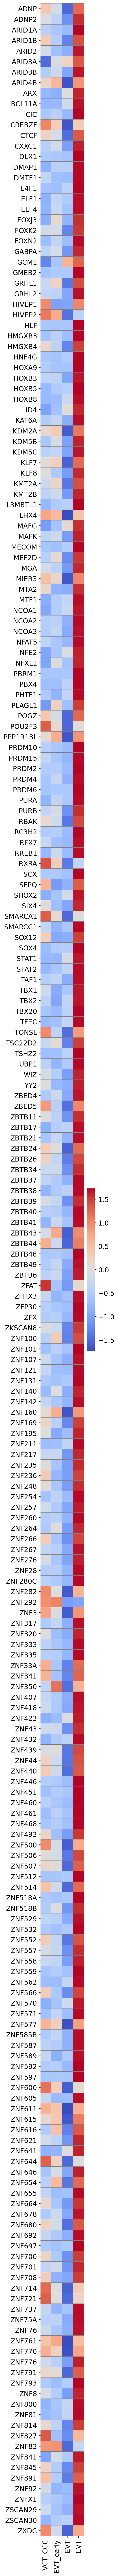

In [69]:
plot_heatmap(TFs_to_visualise_dfs_scaled_only_inv['iEVT_vs_EVT'])

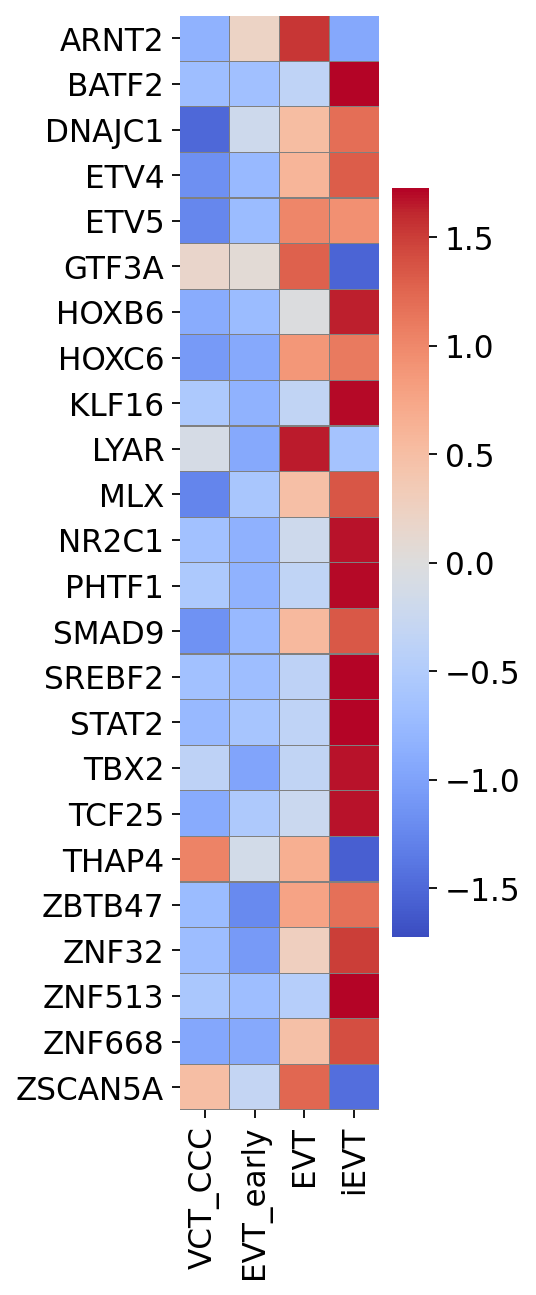

In [92]:
plot_heatmap(TFs_to_visualise_dfs_scaled_only_inv['EVT_vs_EVT_early'])

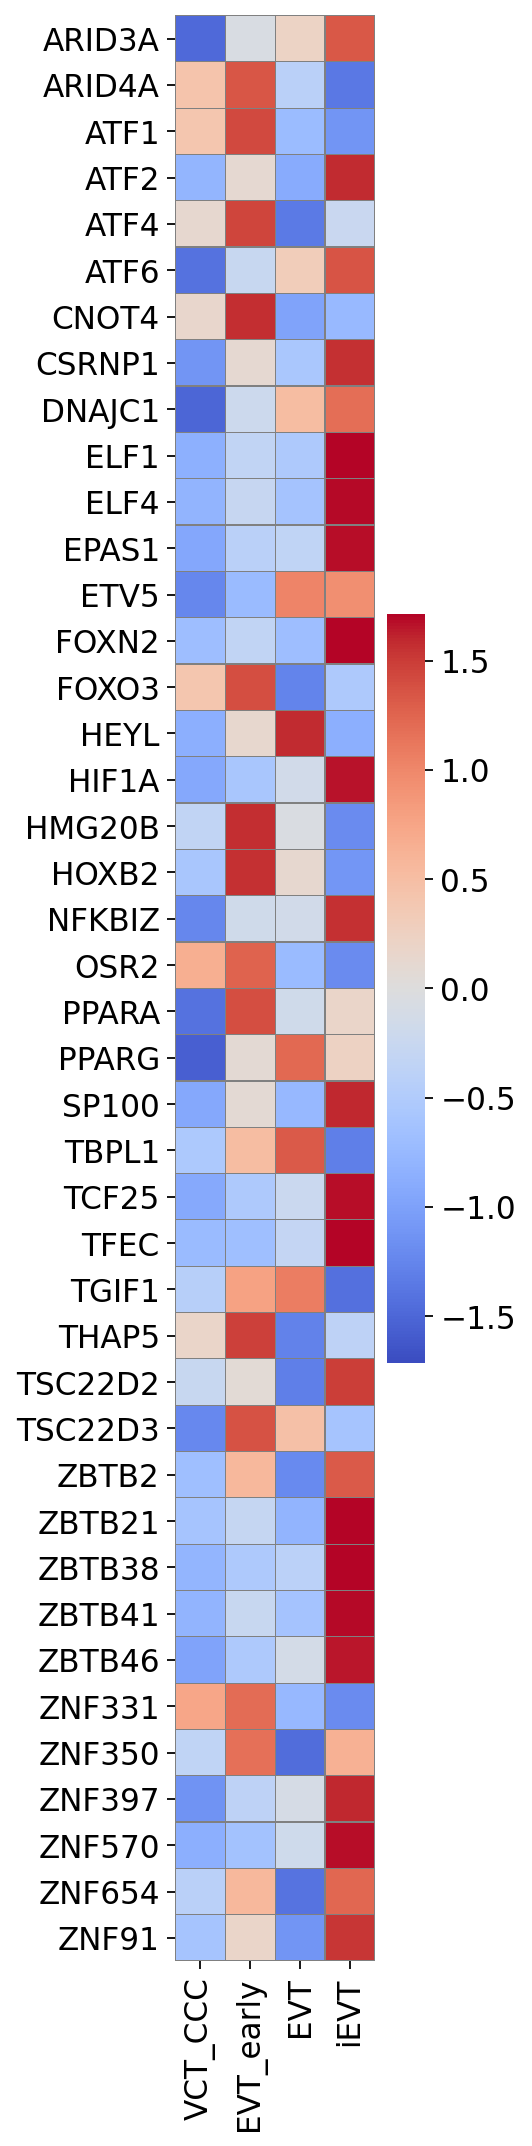

In [94]:
plot_heatmap(TFs_to_visualise_dfs_scaled_only_inv['EVT_early_vs_VCT_CCC'])

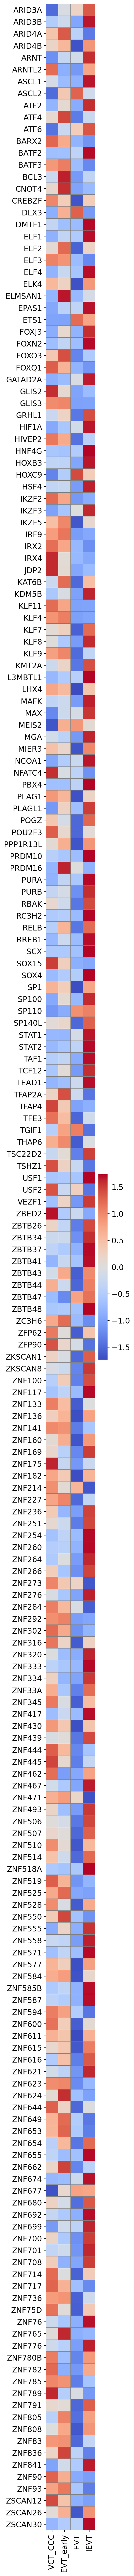

In [95]:
plot_heatmap(TFs_to_visualise_dfs_scaled_only_inv['VCT_CCC_vs_VCT'])

iEVT_vs_EVT
EVT_vs_EVT_early
EVT_early_vs_VCT_CCC
VCT_CCC_vs_VCT


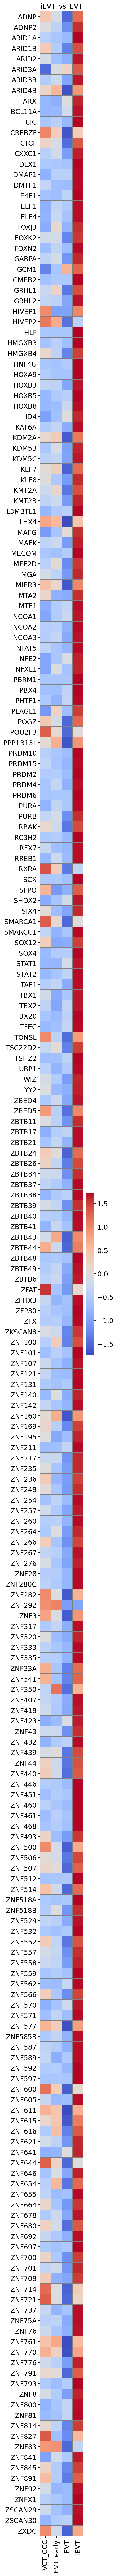

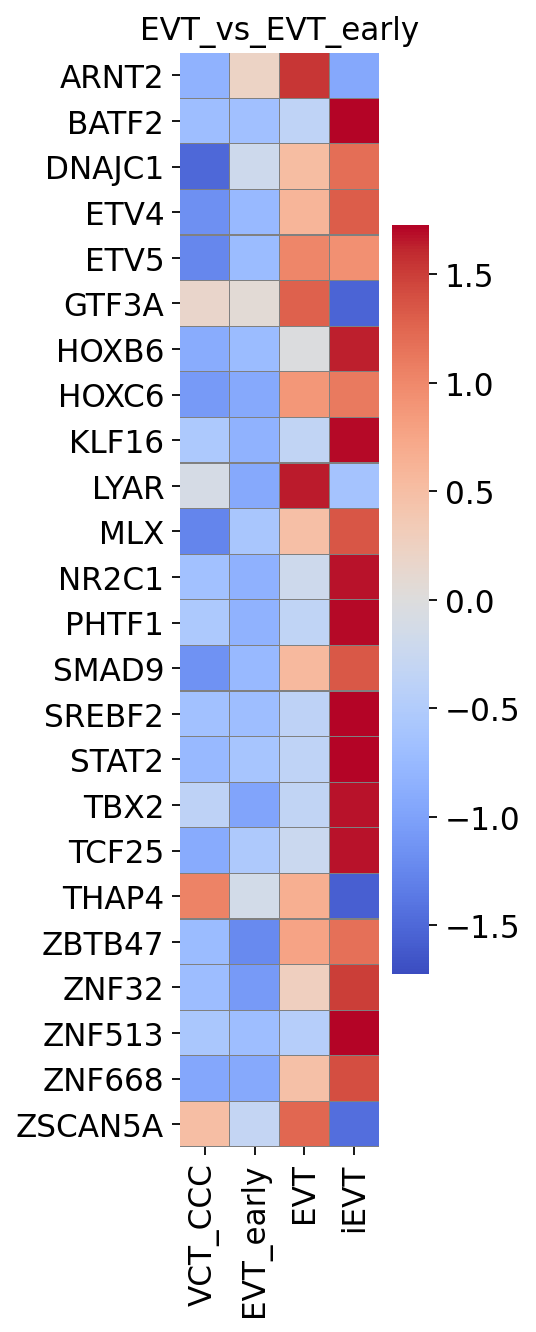

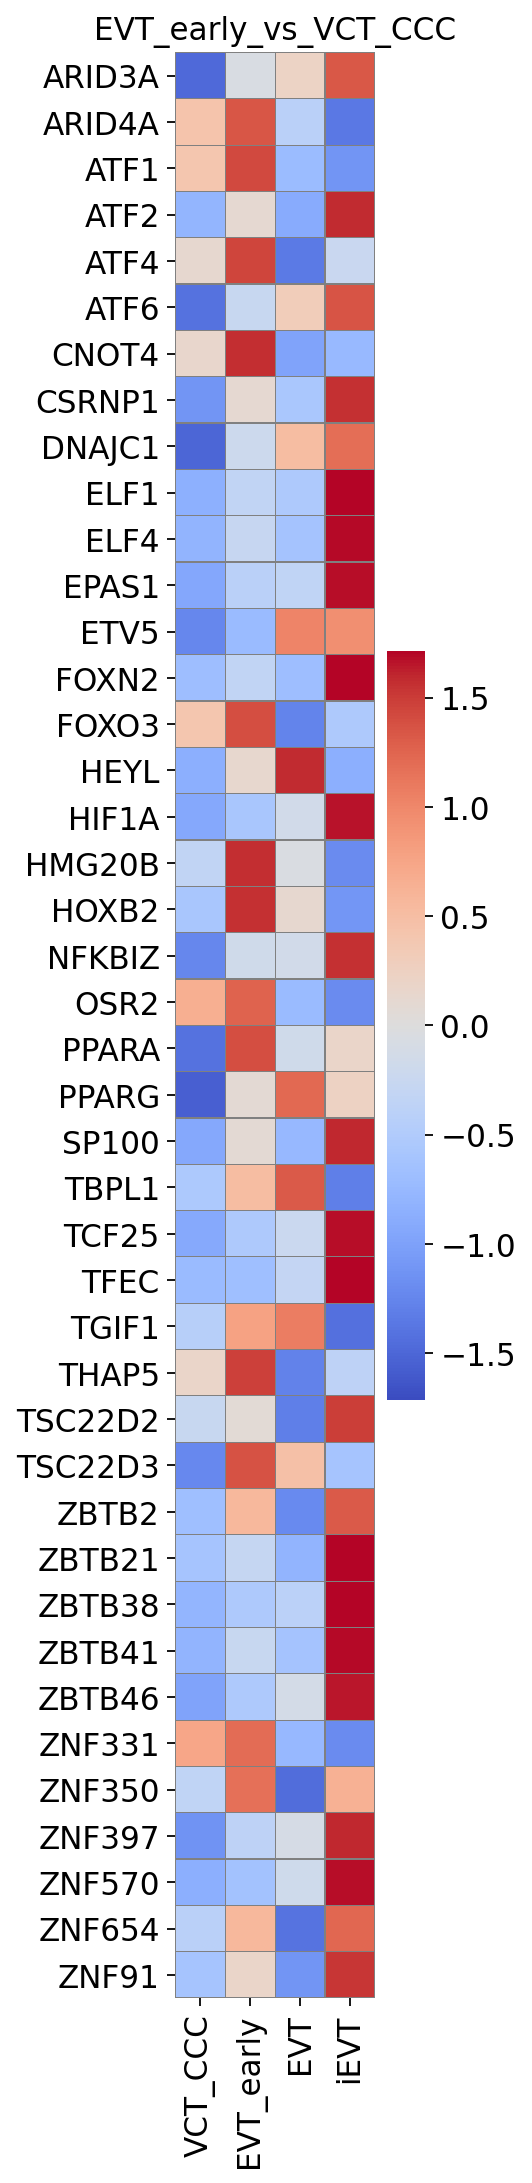

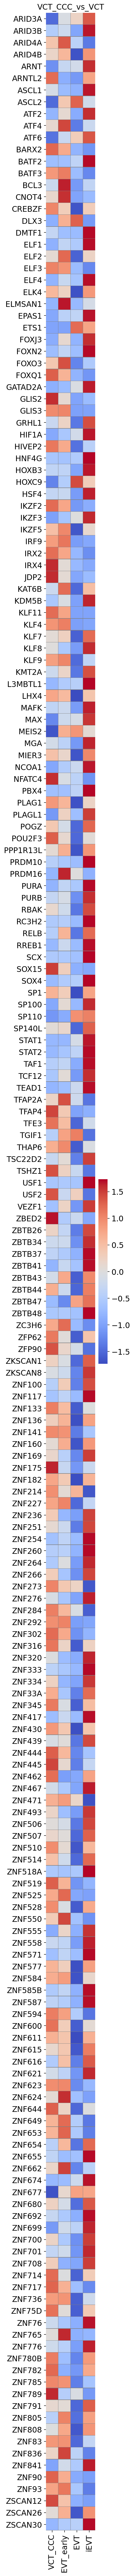

In [96]:
for comparison in comparisons:
    print(comparison)
    
    plot_heatmap(TFs_to_visualise_dfs_scaled_only_inv[comparison], 
                 #abs_color_lim=abs_limit
                )
    
    plt.title(comparison)
    plt.savefig('./figures/20220116_TFs_plot_DE_limma_and_DA_DoRothEA_' + comparison + '_comparison.pdf',
               bbox_inches='tight')

In [ ]:
# old code below

In [94]:
# seeing how the TFs here align with those in vivo (acc to Cellphone-like DE analysis)
TFs_to_visualise_dfs_scaled_in_vivo = {}

comparisons_in_vivo = ['GC_vs_iEVT','eEVT_vs_EVT_3','iEVT_vs_EVT_3',
                        'EVT_3_vs_EVT_2','EVT_2_vs_EVT_1','EVT_1_vs_VCT_CCC',
                        'VCT_CCC_vs_VCT']

for comparison in comparisons_in_vivo:
    print(comparison)
    TFs_to_visualise_dfs_scaled_in_vivo[comparison] = pd.read_csv('/home/jovyan/notebooks/Vento_Lab/MFI_spatial/MFI_sc_sn_Integrated_analysis/TF_activities/intermediate_files/20211013_TFs_DE_limma_and_DA_DoRothEA_' + comparison + '_comparison.csv', 
                                                                   index_col=0)

GC_vs_iEVT
eEVT_vs_EVT_3
iEVT_vs_EVT_3
EVT_3_vs_EVT_2
EVT_2_vs_EVT_1
EVT_1_vs_VCT_CCC
VCT_CCC_vs_VCT


In [95]:
# so pre-GC are not really GC I guess... ?

for comparison_in_vitro in comparisons:
    print('in vitro comparison', comparison_in_vitro)
    
    for comparison_in_vivo in comparisons_in_vivo:
        print('common TFs (DE and DA) between current in vitro comparison', comparison_in_vitro, ' and', comparison_in_vivo, 'in vivo comparison',
              len(set(TFs_to_visualise_dfs_scaled_in_vivo[comparison_in_vivo].index) & set(TFs_to_visualise_dfs_scaled[comparison_in_vitro].index)))

in vitro comparison EVT_late_vs_EVT_mid
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_EVT_mid  and GC_vs_iEVT in vivo comparison 1
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_EVT_mid  and eEVT_vs_EVT_3 in vivo comparison 0
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_EVT_mid  and iEVT_vs_EVT_3 in vivo comparison 0
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_EVT_mid  and EVT_3_vs_EVT_2 in vivo comparison 2
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_EVT_mid  and EVT_2_vs_EVT_1 in vivo comparison 3
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_EVT_mid  and EVT_1_vs_VCT_CCC in vivo comparison 3
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_EVT_mid  and VCT_CCC_vs_VCT in vivo comparison 4
in vitro comparison iEVT_vs_EVT_late
common TFs (DE and DA) between current in vitro comparison iEVT_vs_EVT_late  and GC_vs_

In [70]:
abs_max = []
abs_min = []

for comparison in comparisons:
    print(comparison)
    abs_max.append(abs(np.max(TFs_to_visualise_dfs_scaled[comparison].values)))
    abs_min.append(abs(np.min(TFs_to_visualise_dfs_scaled[comparison].values)))
    
abs_limit = np.max(abs_max + abs_min)

EVT_late_vs_iEVT
iEVT_vs_EVT_early
EVT_early_vs_VCT_CCC
VCT_CCC_vs_VCT
SCT_vs_VCT_fusing
VCT_fusing_vs_VCT


In [71]:
abs_max

[0.8636192083358765,
 0.7009628415107727,
 1.274427890777588,
 1.2862781286239624,
 0.6230957508087158,
 1.5177668333053589]

In [72]:
abs_min

[0.42874276638031006,
 0.42874276638031006,
 0.6659104824066162,
 0.9337814450263977,
 1.050844669342041,
 0.6659104824066162]

In [73]:
abs_limit

1.5177668333053589

EVT_late_vs_iEVT
iEVT_vs_EVT_early
EVT_early_vs_VCT_CCC
VCT_CCC_vs_VCT


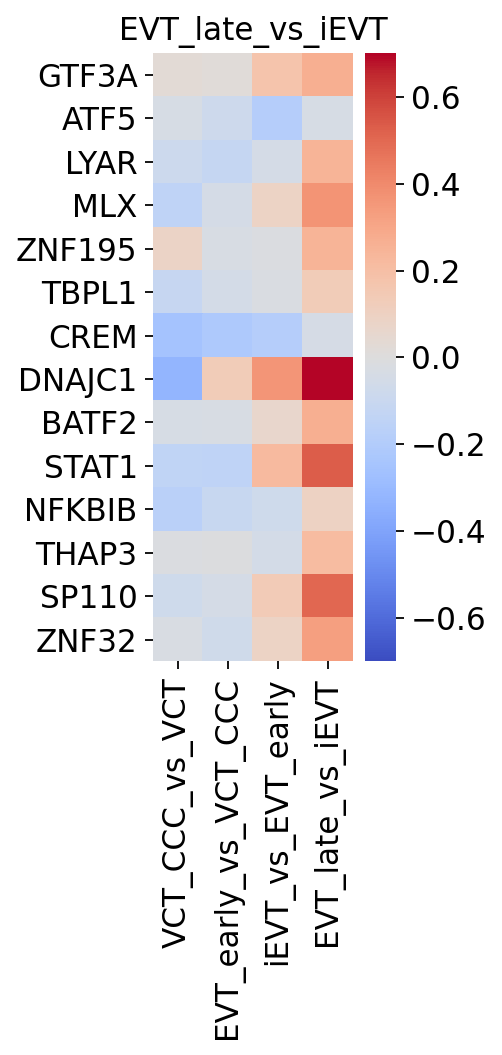

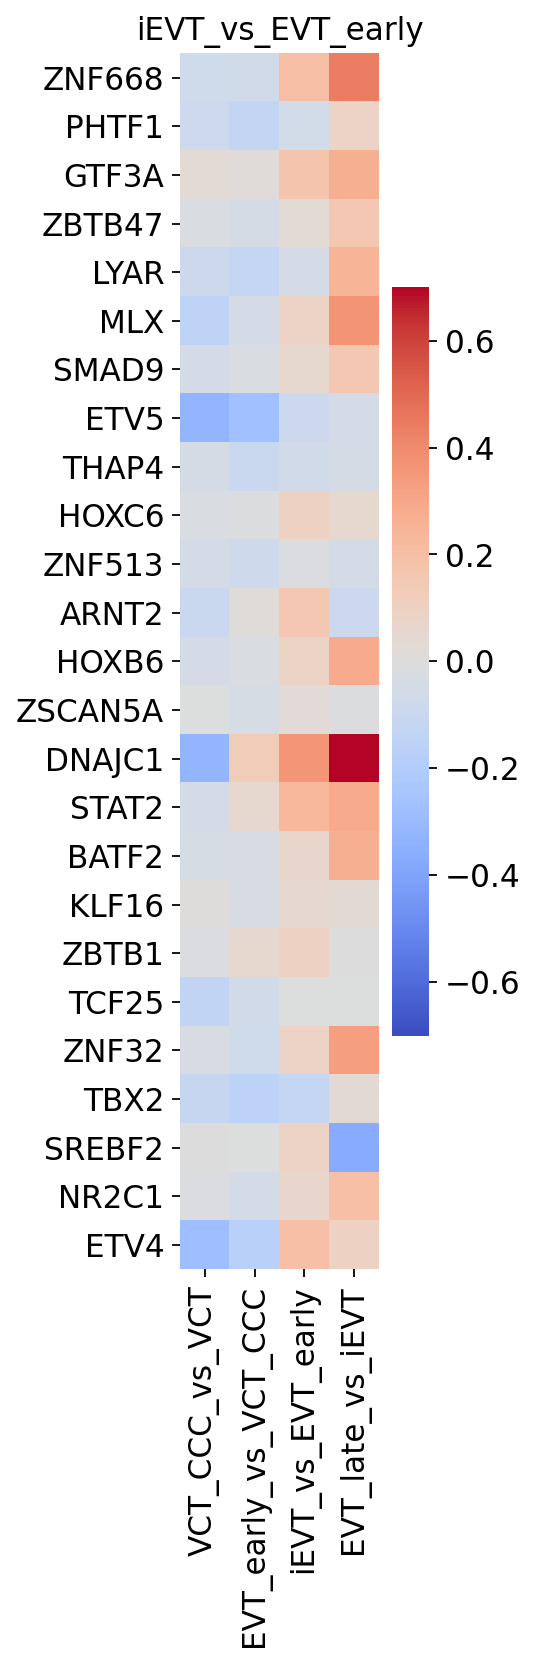

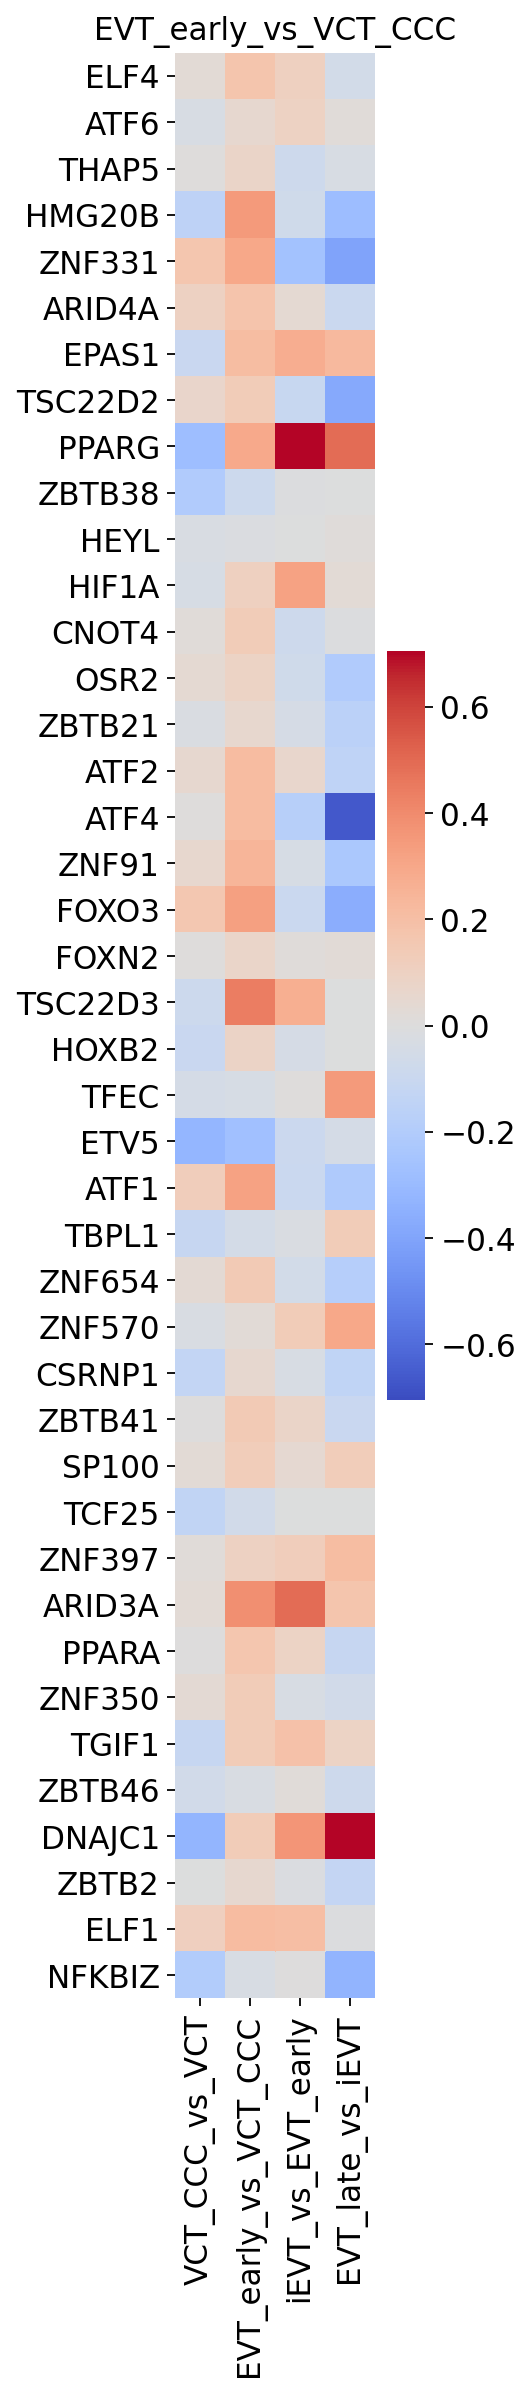

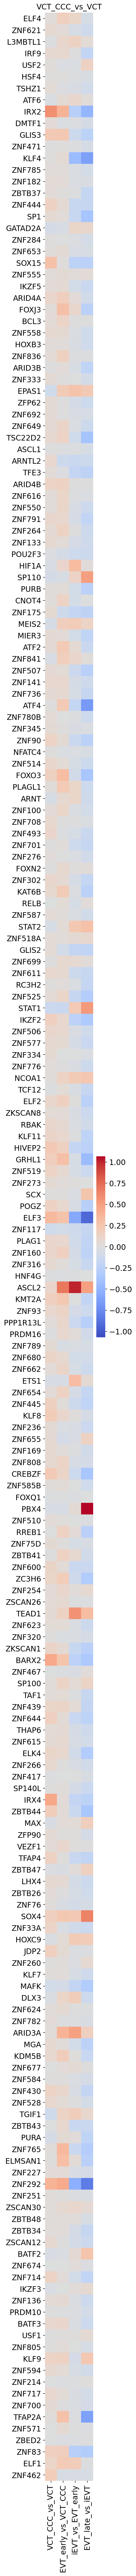

In [85]:
# saving some plots to have a look

order = [#'SCT_vs_VCT_fusing',
         #'VCT_fusing_vs_VCT',
         'VCT_CCC_vs_VCT',
         'EVT_early_vs_VCT_CCC',
         'iEVT_vs_EVT_early',
         'EVT_late_vs_iEVT'
        ]

for comparison in comparisons:
    
    if comparison in ['VCT_CCC_vs_VCT',
         'EVT_early_vs_VCT_CCC',
         'iEVT_vs_EVT_early',
         'EVT_late_vs_iEVT']:
        print(comparison)

        plot_heatmap(TFs_to_visualise_dfs_scaled_invasion[comparison].loc[:,order], 
                     #abs_color_lim=abs_limit
                    )
        plt.title(comparison)
        plt.savefig('./figures/20211015_TFs_plot_DE_limma_and_DA_DoRothEA_' + comparison + '_comparison.pdf',
                   bbox_inches='tight')

In [78]:
TFs_to_visualise_dfs_scaled['EVT_late_vs_iEVT'].index

Index(['GTF3A', 'ATF5', 'LYAR', 'MLX', 'ZNF195', 'TBPL1', 'CREM', 'DNAJC1',
       'BATF2', 'STAT1', 'NFKBIB', 'THAP3', 'SP110', 'ZNF32'],
      dtype='object')

In [79]:
# what about the TFs unique to each comparison/ cell state?

TFs_to_visualise_dfs_scaled_unique = {}

for comparison in comparisons:
    print(comparison) 
    
    TFs_others = []
    for comparison_ in comparisons:
        if comparison_ != comparison:
            TFs_others.append(TFs_to_visualise_dfs_scaled[comparison_].index)
    TFs_others = [item for sublist in TFs_others for item in sublist]
    TFs_others = list(set(TFs_others))
    
    curr_unique_TFs = [TF for TF in TFs_to_visualise_dfs_scaled[comparison].index if TF not in TFs_others]
    list(set(TFs_to_visualise_dfs_scaled[comparison].index) - set(TFs_to_visualise_union))
    
    TFs_to_visualise_dfs_scaled_unique[comparison] = TFs_to_visualise_dfs_scaled[comparison].loc[curr_unique_TFs,:]
    
    print(len(TFs_to_visualise_dfs_scaled_unique[comparison]), 'unique TFs')

EVT_late_vs_iEVT
5 unique TFs
iEVT_vs_EVT_early
15 unique TFs
EVT_early_vs_VCT_CCC
19 unique TFs
VCT_CCC_vs_VCT
173 unique TFs
SCT_vs_VCT_fusing
8 unique TFs
VCT_fusing_vs_VCT
18 unique TFs


In [80]:
abs_max = []
abs_min = []

for comparison in comparisons:
    print(comparison)
    abs_max.append(abs(np.max(TFs_to_visualise_dfs_scaled_unique[comparison].values)))
    abs_min.append(abs(np.min(TFs_to_visualise_dfs_scaled_unique[comparison].values)))
    
abs_limit = np.max(abs_max + abs_min)

EVT_late_vs_iEVT
iEVT_vs_EVT_early
EVT_early_vs_VCT_CCC
VCT_CCC_vs_VCT
SCT_vs_VCT_fusing
VCT_fusing_vs_VCT


In [81]:
abs_limit

1.5177668333053589

EVT_late_vs_iEVT
iEVT_vs_EVT_early
EVT_early_vs_VCT_CCC
VCT_CCC_vs_VCT
SCT_vs_VCT_fusing
VCT_fusing_vs_VCT


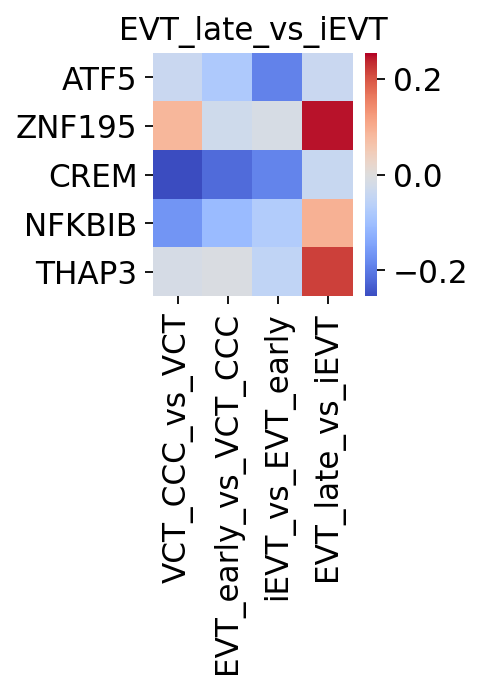

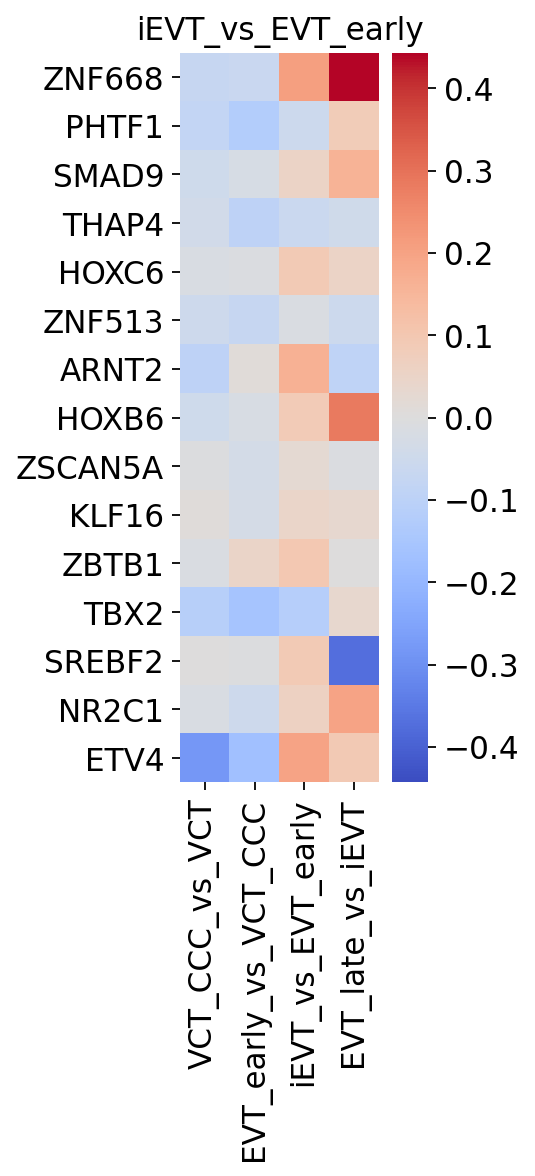

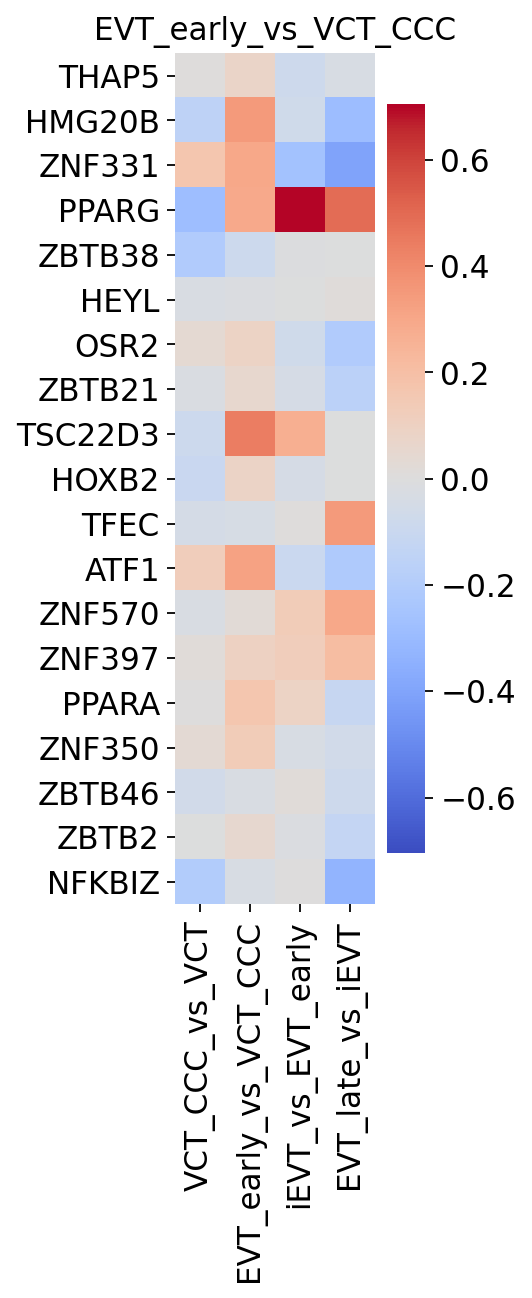

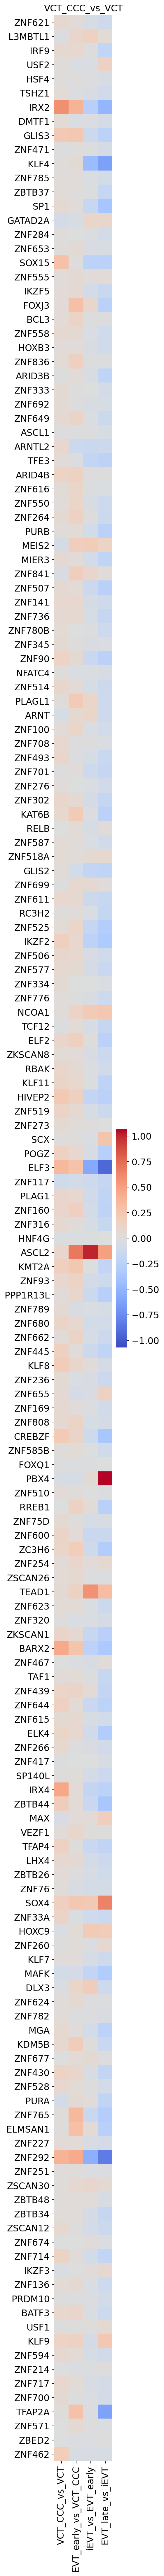

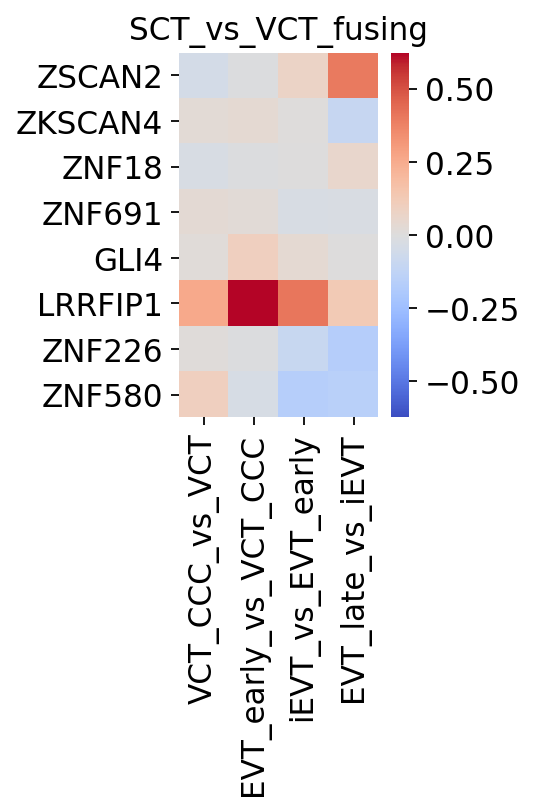

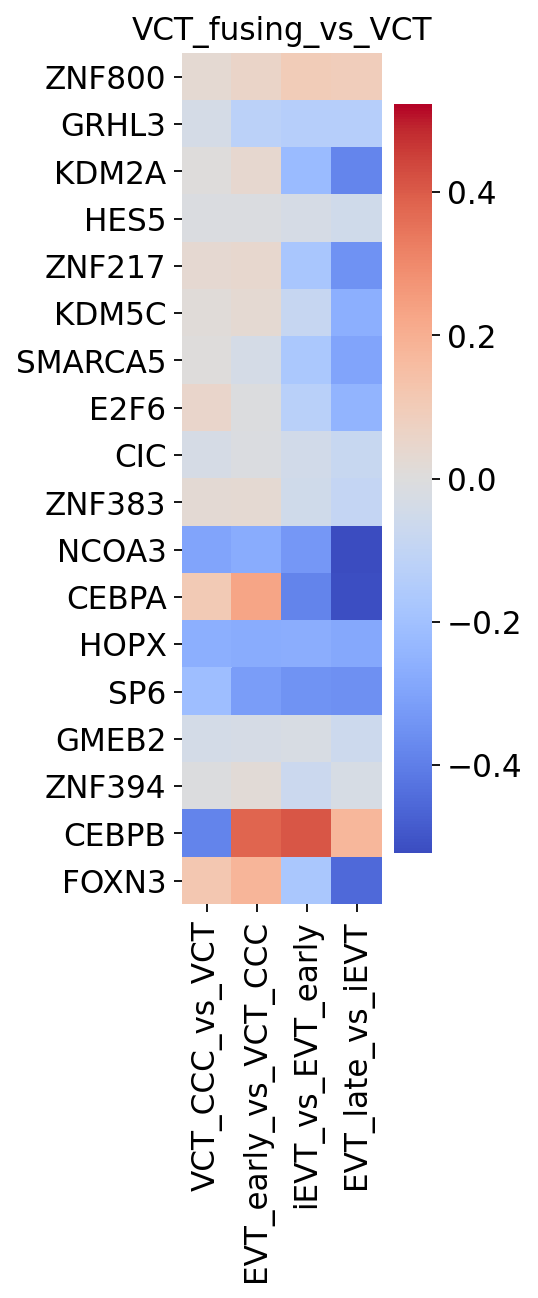

In [82]:
# saving some plots to have a look, unique TFs

order = ['VCT_CCC_vs_VCT',
         'EVT_early_vs_VCT_CCC',
         'iEVT_vs_EVT_early',
         'EVT_late_vs_iEVT'
        ]

for comparison in comparisons:
    print(comparison)
    
    plot_heatmap(TFs_to_visualise_dfs_scaled_unique[comparison].loc[:,order], 
                 #abs_color_lim=abs_limit
                )
    plt.title(comparison)
    plt.savefig('./figures/20211015_unique_TFs_plot_DE_limma_and_DA_DoRothEA_' + comparison + '_comparison.pdf',
               bbox_inches='tight')

In [87]:
TFs_to_visualise_dfs_scaled_unique['EVT_late_vs_iEVT']

EVT_late_vs_iEVT  iEVT_vs_EVT_early  EVT_early_vs_VCT_CCC  \
ATF5           -0.036046          -0.189954             -0.078928   
ZNF195          0.247380          -0.013404             -0.027562   
CREM           -0.039028          -0.186912             -0.217608   
NFKBIB          0.094482          -0.071797             -0.108873   
THAP3           0.218657          -0.051310             -0.006783   

        VCT_CCC_vs_VCT  SCT_vs_VCT_fusing  VCT_fusing_vs_VCT  
ATF5         -0.036136          -0.187471           0.093748  
ZNF195        0.085542          -0.184884          -0.156768  
CREM         -0.254252           0.468856           0.751319  
NFKBIB       -0.166819           0.229473           0.450228  
THAP3        -0.015787          -0.026436           0.002226

In [86]:
for comparison in comparisons:
    print(comparison)
    TFs_to_visualise_dfs_scaled[comparison].to_csv('./intermediate_files/20211015_TFs_DE_limma_and_DA_DoRothEA_' + comparison + '_comparison.csv')

EVT_late_vs_iEVT
iEVT_vs_EVT_early
EVT_early_vs_VCT_CCC
VCT_CCC_vs_VCT
SCT_vs_VCT_fusing
VCT_fusing_vs_VCT


In [91]:
# seeing how the TFs here align with those in vivo (acc to Cellphone-like DE analysis)
TFs_to_visualise_dfs_scaled_in_vivo = {}

comparisons_in_vivo = ['GC_vs_iEVT','eEVT_vs_EVT_3','iEVT_vs_EVT_3',
                        'EVT_3_vs_EVT_2','EVT_2_vs_EVT_1','EVT_1_vs_VCT_CCC',
                        'VCT_CCC_vs_VCT']

for comparison in comparisons_in_vivo:
    print(comparison)
    TFs_to_visualise_dfs_scaled_in_vivo[comparison] = pd.read_csv('/home/jovyan/notebooks/Vento_Lab/MFI_spatial/MFI_sc_sn_Integrated_analysis/TF_activities/intermediate_files/20211013_TFs_DE_limma_and_DA_DoRothEA_' + comparison + '_comparison.csv', 
                                                                   index_col=0)

GC_vs_iEVT
eEVT_vs_EVT_3
iEVT_vs_EVT_3
EVT_3_vs_EVT_2
EVT_2_vs_EVT_1
EVT_1_vs_VCT_CCC
VCT_CCC_vs_VCT


In [94]:
# so pre-GC are not really GC I guess... ?

for comparison_in_vitro in comparisons:
    print('in vitro comparison', comparison_in_vitro)
    
    for comparison_in_vivo in comparisons_in_vivo:
        print('common TFs (DE and DA) between current in vitro comparison', comparison_in_vitro, ' and', comparison_in_vivo, 'in vivo comparison',
              len(set(TFs_to_visualise_dfs_scaled_in_vivo[comparison_in_vivo].index) & set(TFs_to_visualise_dfs_scaled[comparison_in_vitro].index)))

in vitro comparison EVT_late_vs_iEVT
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_iEVT  and GC_vs_iEVT in vivo comparison 1
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_iEVT  and eEVT_vs_EVT_3 in vivo comparison 0
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_iEVT  and iEVT_vs_EVT_3 in vivo comparison 0
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_iEVT  and EVT_3_vs_EVT_2 in vivo comparison 1
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_iEVT  and EVT_2_vs_EVT_1 in vivo comparison 2
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_iEVT  and EVT_1_vs_VCT_CCC in vivo comparison 2
common TFs (DE and DA) between current in vitro comparison EVT_late_vs_iEVT  and VCT_CCC_vs_VCT in vivo comparison 3
in vitro comparison iEVT_vs_EVT_early
common TFs (DE and DA) between current in vitro comparison iEVT_vs_EVT_early  and GC_vs_iEVT in vivo compariso

In [88]:
TFs_to_visualise_dfs_scaled['EVT_late_vs_iEVT']

EVT_late_vs_iEVT  iEVT_vs_EVT_early  EVT_early_vs_VCT_CCC  \
GTF3A           0.268569           0.177933              0.018737   
ATF5           -0.036046          -0.189954             -0.078928   
LYAR            0.248754          -0.048206             -0.116590   
MLX             0.367405           0.088729             -0.046395   
ZNF195          0.247380          -0.013404             -0.027562   
TBPL1           0.132854          -0.021429             -0.050550   
CREM           -0.039028          -0.186912             -0.217608   
DNAJC1          0.700963           0.364260              0.132224   
BATF2           0.270518           0.064146             -0.032714   
STAT1           0.533326           0.219269             -0.146132   
NFKBIB          0.094482          -0.071797             -0.108873   
THAP3           0.218657          -0.051310             -0.006783   
SP110           0.504828           0.138245             -0.048715   
ZNF32           0.331692           0.089485             -0.069606   

        VCT_CCC_vs_VCT  SCT_vs_VCT_fusing  VCT_fusing_vs_VCT  
GTF3A         0.031827          -0.369978          -0.428743  
ATF5         -0.036136          -0.187471           0.093748  
LYAR         -0.086441          -0.215919          -0.066562  
MLX          -0.144456           0.000393           0.096748  
ZNF195        0.085542          -0.184884          -0.156768  
TBPL1        -0.110119           0.114339           0.863619  
CREM         -0.254252           0.468856           0.751319  
DNAJC1       -0.327908           0.282039          -0.100941  
BATF2        -0.037896          -0.066435          -0.061016  
STAT1        -0.137083           0.031903          -0.257914  
NFKBIB       -0.166819           0.229473           0.450228  
THAP3        -0.015787          -0.026436           0.002226  
SP110        -0.072588          -0.121224           0.055257  
ZNF32        -0.022736          -0.191617          -0.226932

In [ ]:
# trying to prioritise regulons somehow?

In [89]:
TF_activities['EVT_late_vs_iEVT']

Regulon  Size        NES        p.value            FDR score  \
GTF3A_E    GTF3A_E  1209  23.723408  2.067814e-124  2.863922e-121     E   
PHF5A_E    PHF5A_E  1701  20.741725   1.456099e-95   1.008348e-92     E   
THAP4_E    THAP4_E  1144  17.091742   1.709895e-65   7.894017e-63     E   
NFKBIB_E  NFKBIB_E   805  13.704368   9.559612e-43   3.310016e-40     E   
ZNF787_E  ZNF787_E   660  13.616954   3.175379e-42   8.795800e-40     E   
...            ...   ...        ...            ...            ...   ...   
ZBTB32_E  ZBTB32_E    78   0.004895   9.960941e-01   9.989792e-01     E   
SCRT2_E    SCRT2_E   364  -0.002276   9.981841e-01   9.996795e-01     E   
DMRTC2_E  DMRTC2_E    97  -0.001348   9.989241e-01   9.996795e-01     E   
FOXO6_D    FOXO6_D    35  -0.001306   9.989578e-01   9.996795e-01     D   
SOHLH1_E  SOHLH1_E    58   0.000057   9.999543e-01   9.999543e-01     E   

         TF_name  
GTF3A_E    GTF3A  
PHF5A_E    PHF5A  
THAP4_E    THAP4  
NFKBIB_E  NFKBIB  
ZNF787_E  ZNF787  
...          ...  
ZBTB32_E  ZBTB32  
SCRT2_E    SCRT2  
DMRTC2_E  DMRTC2  
FOXO6_D    FOXO6  
SOHLH1_E  SOHLH1  

[1385 rows x 7 columns]

In [58]:
TFs_upregulated_per_comparison['pre-GC_vs_iEVT']['Avg_expr'].value_counts()

not_enough_cells_expr_limma    100
0.0                             82
0.002268                         2
0.002454                         2
0.040952                         1
                              ... 
0.057622                         1
0.0094                           1
0.385369                         1
0.433657                         1
0.036113                         1
Name: Avg_expr, Length: 662, dtype: int64

In [51]:
DEGs_significant_upreg_TFs['pre-GC_vs_iEVT'].shape

(362, 7)

In [54]:
DEGs_significant_upreg_TFs['pre-GC_vs_iEVT']

logFC       P.Value     adj.P.Val  AveExpr_cluster  AveExpr_rest  \
Gene                                                                            
ELK3      0.050300  1.432382e-03  5.656830e-03         0.148101      0.068865   
ZNF208    0.013814  1.071537e-04  5.281279e-04         0.019145      0.003609   
SOX4      0.313175  5.385102e-09  4.818886e-08         1.473836      0.958236   
KMT2A     0.159378  8.524539e-09  7.460504e-08         0.403618      0.224550   
FOXN2     0.136677  2.689868e-09  2.511271e-08         0.305624      0.154394   
SP3       0.085893  1.652190e-03  6.420773e-03         0.350268      0.230239   
HOXB3     0.028225  1.754425e-06  1.145162e-05         0.039908      0.008461   
ZNF280C   0.042592  2.882932e-07  2.102570e-06         0.064851      0.016472   
ZBED6     0.012557  4.310728e-03  1.520085e-02         0.018030      0.005111   
HOXB5     0.006512  1.999696e-05  1.107565e-04         0.006790      0.000367   
ZNF493    0.075696  5.842128e-08  4.652573e-07         0.128424      0.052216   
ZNF518B   0.048187  1.573439e-02  4.796324e-02         0.165933      0.111710   
ARX       0.020618  4.526165e-03  1.585690e-02         0.036629      0.014483   
GRHL1     0.408651  3.158336e-24  9.016722e-23         1.016575      0.609635   
ZBTB18    0.023345  3.842949e-04  1.700328e-03         0.038749      0.009785   
TONSL     0.020495  1.650790e-03  6.416534e-03         0.032151      0.010388   
ZNF418    0.015302  1.395392e-06  9.227419e-06         0.018776      0.002632   
ZNF692    0.091964  9.087533e-11  1.011257e-09         0.146752      0.054020   
SMAD2     0.066124  1.307434e-02  4.080408e-02         0.315503      0.222202   
PAX6      0.008307  3.901236e-04  1.723907e-03         0.009269      0.000821   
ARID3A    0.273194  1.422995e-12  1.905119e-11         2.121410      1.925971   
ZNF600    0.046311  1.618190e-03  6.308778e-03         0.098425      0.055443   
ZNF845    0.030858  3.611872e-04  1.607710e-03         0.048485      0.019611   
MYCN      0.366478  1.916751e-17  3.789199e-16         1.126065      0.648024   
TFCP2     0.040066  8.515445e-03  2.787926e-02         0.116552      0.064501   
ZNF76     0.070502  6.039204e-08  4.796602e-07         0.129253      0.046571   
ATF6B     0.180321  8.298608e-12  1.029147e-10         0.415939      0.222607   
RERE      0.123060  4.965823e-05  2.585726e-04         0.461313      0.290498   
BNC1      0.002363  5.085528e-06  3.114209e-05         0.002423      0.000051   
ZNF655    0.306455  6.931363e-28  2.367415e-26         0.581718      0.237373   
ZNF248    0.053509  3.665258e-06  2.295416e-05         0.087641      0.033815   
ZFP30     0.031787  1.361320e-03  5.399886e-03         0.057622      0.026053   
ZNF532    0.050398  1.308673e-20  3.117020e-19         0.062163      0.007056   
PRDM6     0.013139  5.219159e-07  3.685641e-06         0.014505      0.001356   
MZF1      0.059948  2.545652e-08  2.103389e-07         0.097526      0.029948   
ZNF266    0.024825  2.765378e-03  1.019191e-02         0.045140      0.017852   
ARNTL2    0.032629  5.597708e-04  2.389880e-03         0.063247      0.024865   
DMTF1     0.119717  4.203787e-11  4.852760e-10         0.206215      0.087672   
PBRM1     0.285007  4.073346e-23  1.092100e-21         0.563186      0.258621   
ZNF211    0.018457  1.435479e-02  4.431251e-02         0.036819      0.014714   
ZNF169    0.024070  4.899991e-04  2.118655e-03         0.033201      0.011965   
ZGPAT     0.008044  1.328585e-02  4.139555e-02         0.010824      0.002766   
ZNF721    0.049003  9.218346e-03  2.992962e-02         0.137915      0.093795   
HIF1A     0.243628  2.034084e-10  2.167943e-09         0.909478      0.552167   
ZNF544    0.031563  9.123767e-03  2.964580e-02         0.069082      0.039594   
ZNF714    0.062772  4.667713e-04  2.027475e-03         0.122013      0.084235   
ZBTB48    0.034488  3.880150e-03  1.385634e-02         0.082020      0.037858   
PSPC1     0.105296  2.694018e-03  9.959062e-

In [46]:
TF_activities_upreg['pre-GC_vs_iEVT']

Regulon  Size        NES        p.value            FDR score  \
KDM2A_E      KDM2A_E   597  23.594266  4.413629e-123  1.222575e-120     E   
PBRM1_E      PBRM1_E  1036  21.424853  7.838167e-102   1.550837e-99     E   
RC3H2_E      RC3H2_E   886  21.172970   1.695314e-99   2.935012e-97     E   
ZNF142_E    ZNF142_E   530  19.925026   2.469190e-88   3.419828e-86     E   
MIER3_E      MIER3_E   477  19.837995   1.399292e-87   1.761836e-85     E   
...              ...   ...        ...            ...            ...   ...   
KLF16_E      KLF16_E   763   2.185829   2.882815e-02   4.664368e-02     E   
ZSCAN31_E  ZSCAN31_E   432   2.183367   2.900881e-02   4.688122e-02     E   
EMX2_E        EMX2_E   421   2.173282   2.975909e-02   4.803769e-02     E   
DNAJC2_E    DNAJC2_E  1220   2.166583   3.026668e-02   4.880017e-02     E   
NKX2-5_E    NKX2-5_E   641   2.164337   3.043849e-02   4.902012e-02     E   

           TF_name  
KDM2A_E      KDM2A  
PBRM1_E      PBRM1  
RC3H2_E      RC3H2  
ZNF142_E    ZNF142  
MIER3_E      MIER3  
...            ...  
KLF16_E      KLF16  
ZSCAN31_E  ZSCAN31  
EMX2_E        EMX2  
DNAJC2_E    DNAJC2  
NKX2-5_E    NKX2-5  

[710 rows x 7 columns]